According to the World Health Organization (WHO), 15 million people worldwide suffer a stroke annually, and  stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. In South Africa, 10 people have strokes every hour [(Heart and Stroke Foundation South Africa (HSFSA))](https://www.heartfoundation.co.za/wp-content/uploads/2017/10/CVD-Stats-Reference-Document-2016-FOR-MEDIA-1.pdf).

This analysis is done to predict the likelihood of individuals getting stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

#### Loading modules and packages

In [1]:
#### EDA Libraries ####

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn.metrics import mutual_info_score

#### Dataset Examination:

In [2]:
### Loading the dataset

df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

df_stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print('No. of Rows and Column in this dataset:')
print(df_stroke.shape)

No. of Rows and Column in this dataset:
(5110, 12)


In [4]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There exists missing/NA values in the `bmi` columns. These rows will be discarded for the prediction model in the downstream process!

This dataset contains **5110 rows and 12 columns** of stroke data with:

1. `id` [numerical] - unique identifier of each data
2. `gender` [categorical] - Contains: "Male", "Female" or "Other".
3. `age` [numerical] - Age of the patients
4. `hypertension` [numerical] - binary values: 0 for those who don't have hypertension; 1 for those who have hypertension.
5. `heart_disease` [numerical] - binary values: 0 for those who don't have heart disease; 1 for those who have heart disease.
6. `ever_married` [categorical] - Contains: "Yes" or "No"
7. `work_type` [categorical] - Contains: "Private", "Self-employed", "never_worked", "Govt_jov" and "children". Here, "children" indicates that they are children. 
8. `Residence_type` [categorical] - Contains: "Rural" or "Urban"
9. `avg_glucose_level` [numerical] - Describes the amount of glucose level in blood on average in the patients.
10. `bmi` [numerical] - Describes the Body Mass Index (BMI) of the patients.
11. `smoking_status` [categorical] - Contains: "formerly smoked", "never smoked", "smokes" or "Unknown".
12. `stroke` [target-variable] - binary values: 0 for those who don't have stroke; 1 for those who have stroke. 

## Univariate Analysis

#### **Examining the Target Variable (Stroke):**

In [6]:
# print('Distribution of stroke individuals in the dataset: ')
# print(df_stroke['stroke'].value_counts())

# print()

# print('Percentage:')
# print(round(df_stroke['stroke'].value_counts(normalize=True) * 100, 2))

In [7]:
# plt.figure(figsize = (5, 10))

# stroke_values = df_stroke['stroke'].value_counts()

# fig = px.bar(df_stroke, x = stroke_values.index, y = stroke_values.values, text=stroke_values.values,
#              title = 'Distribution of Stroke')

# fig.update_layout(xaxis_title = 'Stroke', yaxis_title = 'Count', width=500, height=500)

# ### Sorting the X-axis to display 0: No Stroke and 1: Stroke.
# fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['No Stroke', 'Have Stroke']))
# fig.show()


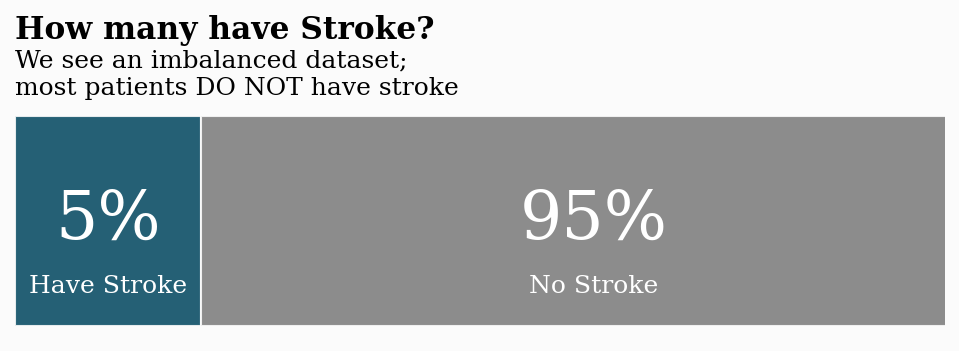

In [8]:
x= df_stroke.groupby(['stroke'])['stroke'].count()
y= len(df_stroke)
r= ((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(8, 2), dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 


ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Have Stroke')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='No Stroke')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.xlim(0, 0.25)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Have Stroke", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/9, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("No Stroke", xy=(ratio[1.0][i]+ratio[0.0][i]/9, -0.25), va = 'center', ha='center', fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many have Stroke?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost patients DO NOT have stroke',fontfamily='serif',fontsize=12);

**About the target variable of interest `stroke`:**
- ~ 95% (4,861) patients do NOT have stroke. ~5% (249) patients HAVE stroke in the dataset. This indicates for class imbalance towards predictive modeling. This will cause machine learning algorithms not to adapt well, giving misleading results. 

- **Majority Class**: Individuals WITH NO stroke. 
- **Minority Class**: Individuals WITH stroke 

**General plan (Goal) of this analysis:**
- We have a binary classification problem (due to patients having (1) stroke and no stroke (0))
- The prediction will be made on the `stroke`. 
- The distribution of target variable tells us that the data is skewed towards the majority class (Patients with NO stroke). 
- For the performance measurement in the prediction, the "Area Under the ROC Curve" will be used. This tells how much the model is capable of distinguishing between classes. In this case "Having Stroke" and "Having No Stroke"

#### Separating Categorical and Numerical Data:

In [9]:
def separate_dataset():
    df_stroke_categorical = df_stroke[['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']]
    df_stroke_numerical = df_stroke[['age', 'avg_glucose_level', 'bmi']]

    return df_stroke_categorical, df_stroke_numerical

In [10]:
df_stroke_categorical, df_stroke_numerical = separate_dataset()

In [11]:
df_stroke_numerical.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


#### **Examining the Numerical Data (`age`, `avg_glucose_level`, `bmi`):**

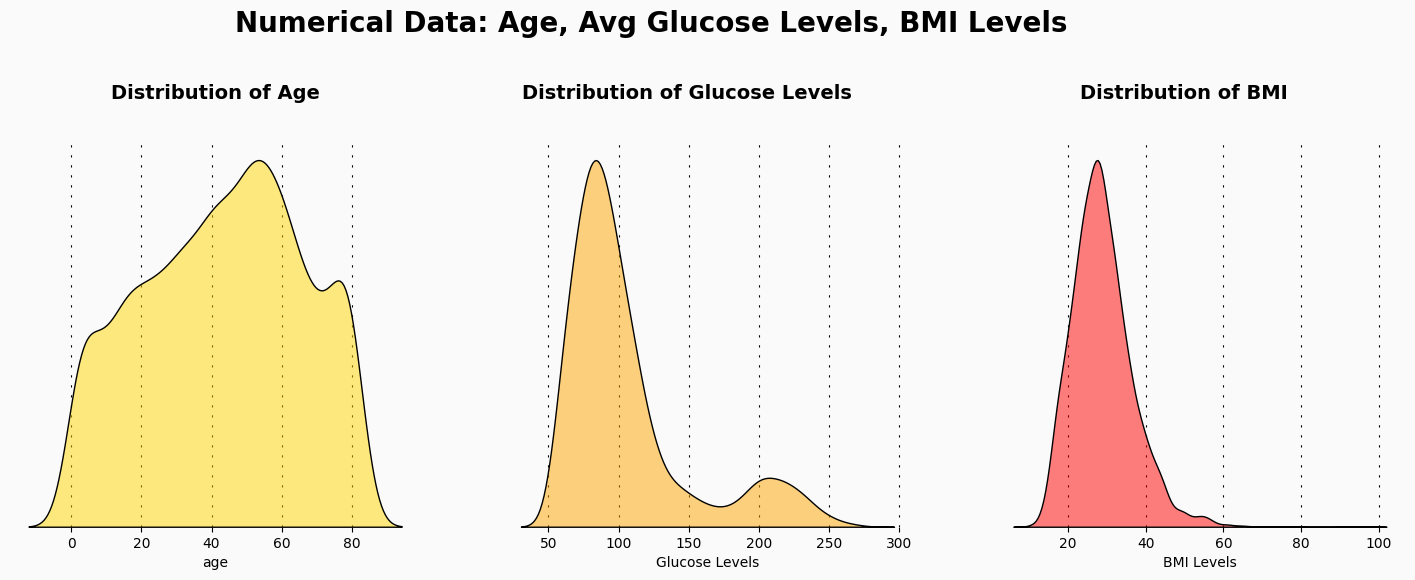

In [12]:
#### Using seaborn to plot histograms ####

fig, ax = plt.subplots(1, 3, figsize = (18, 5), facecolor='#fafafa')
fig.text(0.25, 1.1, 'Numerical Data: Age, Avg Glucose Levels, BMI Levels', {'font':'sans serif', 'weight':'bold','color': 'black', 'size': 20})

## Using Seaborn to plot the graphs for the numerical data
g1 = sns.kdeplot(data = df_stroke_numerical, x = 'age', fill = True, color = 'Gold', linewidth=1, edgecolor='black', alpha=0.5, 
                 ax = ax[0])
ax[0].text(x=0.5, y=1.1, s = 'Distribution of Age', fontsize = 14, weight='bold', ha='center', va='bottom', transform=ax[0].transAxes)

g2 = sns.kdeplot(data = df_stroke_numerical, x = 'avg_glucose_level', fill = True, color = 'orange', edgecolor='black', alpha=0.5,
                 ax = ax[1])
ax[1].set_xlabel('Glucose Levels')
ax[1].text(x=1.65, y=1.1, s='Distribution of Glucose Levels', fontsize = 14, weight='bold', ha='center', va='bottom', transform=ax[0].transAxes)


g3 = sns.kdeplot(data = df_stroke_numerical, x = 'bmi', fill = True, color = 'red',  edgecolor='black', alpha=0.5,
                 ax = ax[2])
ax[2].set_xlabel('BMI Levels')
ax[2].text(x=2.86, y=1.1, s='Distribution of BMI', fontsize = 14, weight='bold', ha='center', va='bottom', transform=ax[0].transAxes)

## Editing the graph properties and removing the border/frames:
for i in range(3):
    ax[i].set(axisbelow = True)
    ax[i].set_ylabel('')
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_facecolor('#fafafa')
    ax[i].grid(which='major', axis = 'x', color='black', linestyle=':', dashes=(2,7))
    for b in ['top', 'bottom', 'right', 'left']:
        ax[i].spines[b].set_visible(False)

WHAT WE KNOW FROM -> **Numerical Data:**

- `age` is slightly skewed to the left (explained by median: 45, mean: 43.22).
- `avg_glucose_level` is skewed to the right (explained by median: 91.88, mean: 106.14).
- `bmi` is skewed to the right (explained by median: 28.10, mean: 28.89).


In [13]:
#### Using Plotly to plot the histogram for numerical data ####

# fig = make_subplots(rows = 1, cols = 3, 
#                     subplot_titles=("Age", "Avg Glucose Lvls", "BMI Lvls"))

# fig.add_trace(go.Histogram(x = df_stroke_numerical['age']), row = 1, col = 1)
# fig.add_trace(go.Histogram(x = df_stroke_numerical['avg_glucose_level']), row = 1, col = 2)
# fig.add_trace(go.Histogram(x = df_stroke_numerical['bmi']), row = 1, col = 3)

# #### Updating X-axis titles
# fig.update_xaxes(title_text="Ages", row=1, col=1)
# fig.update_xaxes(title_text="Glucose Levels", row=1, col=2)
# fig.update_xaxes(title_text="BMI levels", row=1, col=3)

# #### Updating y-axis titles
# fig.update_yaxes(title_text="Count", row=1, col=1)
# fig.update_yaxes(title_text="Count", row=1, col=2)
# fig.update_yaxes(title_text="Count", row=1, col=3)

# #### Updating the title and height
# # Update title and height
# fig.update_layout(title_text="Numerical Data Examination", width = 1000, height = 500)

# fig.show()

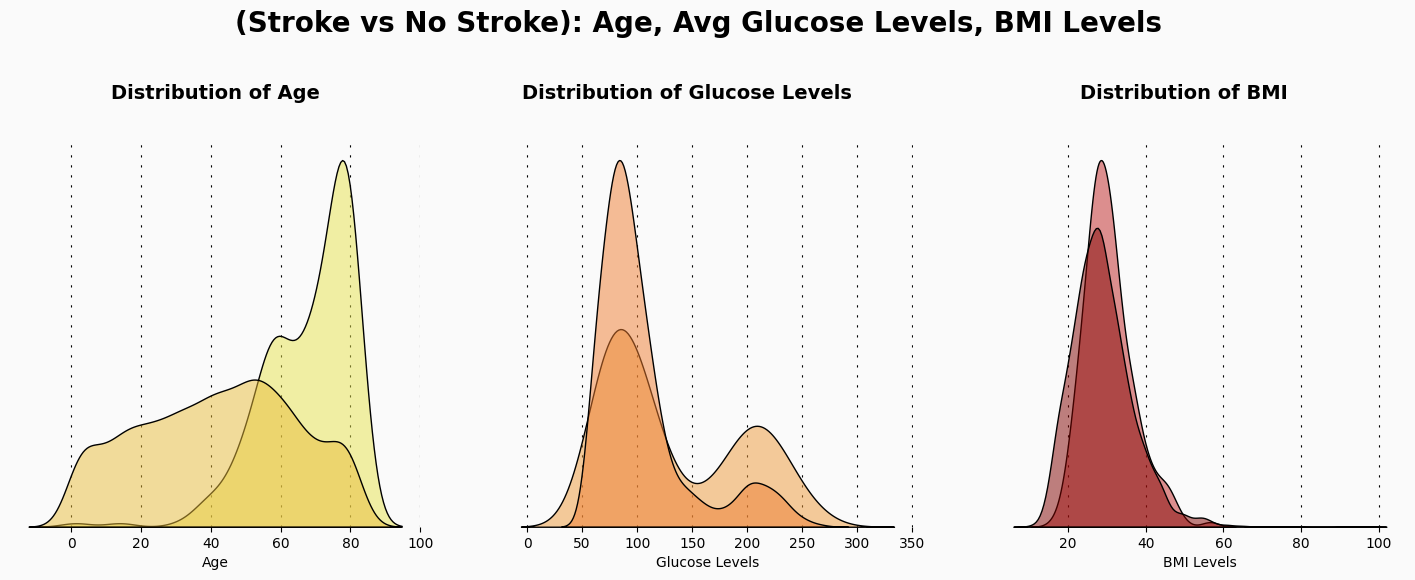

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5), facecolor='#fafafa')
fig.text(0.25, 1.1, '(Stroke vs No Stroke): Age, Avg Glucose Levels, BMI Levels', {'font':'sans serif', 'weight':'bold','color': 'black', 'size': 20})

## Using Seaborn to plot the graphs for the numerical data

yes_stroke = df_stroke[df_stroke['stroke'] == 1]
no_stroke = df_stroke[df_stroke['stroke'] == 0]
axe = 0
yes_color = ['#E7E34E', '#EE9A3A', '#C02323']
no_color = ['#EABD3B', '#EF7E32', '#820401']

for cats, yescolor, nocolor in zip(df_stroke_numerical, yes_color, no_color):
    sns.kdeplot(data = yes_stroke, x = cats, fill = True, color = yescolor, linewidth=1, edgecolor='black', alpha=0.5, 
                    ax = ax[axe])
    sns.kdeplot(data = no_stroke, x = cats, fill = True, color = nocolor, linewidth=1, edgecolor='black', alpha=0.5, 
                    ax = ax[axe])
    axe += 1

ax[0].text(x=0.5, y=1.1, s = 'Distribution of Age', fontsize = 14, weight='bold', ha='center', va='bottom', transform=ax[0].transAxes)
ax[1].text(x=1.65, y=1.1, s = 'Distribution of Glucose Levels', fontsize = 14, weight='bold', ha='center', va='bottom', transform=ax[0].transAxes)
ax[2].text(x=2.86, y=1.1, s='Distribution of BMI', fontsize = 14, weight='bold', ha='center', va='bottom', transform=ax[0].transAxes)
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Glucose Levels')
ax[2].set_xlabel('BMI Levels')

## Editing the graph properties and removing the border/frames:
for i in range(3):
    ax[i].set(axisbelow = True)
    ax[i].set_ylabel('')
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_facecolor('#fafafa')
    ax[i].grid(which='major', axis = 'x', color='black', linestyle=':', dashes=(2,7))
    for b in ['top', 'bottom', 'right', 'left']:
        ax[i].spines[b].set_visible(False)

WHAT WE FIND OUT:
- The difference in the distribution is more prominent in the `age` feature. 
- As you get older, a higher risk for stroke. 
- This could be a contributing factor towards the stroke predictive modeling downstream. 

#### Examining the Categorical Data:

Renaming the columns for the categorical dataset:

In [15]:
### Updating the values of categorical datas:

df_stroke_categorical['hypertension'] = df_stroke['hypertension'].map({1:'yes', 0:'no'})
df_stroke_categorical['heart_disease'] = df_stroke['heart_disease'].map({1:'yes', 0:'no'})
df_stroke_categorical['ever_married'] = df_stroke['ever_married'].map({'Yes':'yes', 'No':'no'})
df_stroke_categorical['Residence_type'] = df_stroke['Residence_type'].map({'Urban':'urban', 'Rural':'rural'})
df_stroke_categorical['work_type'] = df_stroke['work_type'].map({'Private':'private', 'Self-employed':'self-employed', 'Govt_job':'govt-job', 'children':'children', 'Never_worked':'never-worked'})
df_stroke_categorical['smoking_status'] = df_stroke['smoking_status'].map({'formerly smoked':'Formerly', 'never smoked':'Never', 'smokes':'Smokes', 'Unknown':'Unknown'})

C:\Users\Yuu\AppData\Local\Temp\ipykernel_12108\2114080611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke_categorical['hypertension'] = df_stroke['hypertension'].map({1:'yes', 0:'no'})
C:\Users\Yuu\AppData\Local\Temp\ipykernel_12108\2114080611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke_categorical['heart_disease'] = df_stroke['heart_disease'].map({1:'yes', 0:'no'})
C:\Users\Yuu\AppData\Local\Temp\ipykernel_12108\2114080611.py:5: SettingWithCopyWarning: 
A value is trying to

In [16]:
# custom function to change labels    
def newLegend(fig, newNames):
    newLabels = []
    for item in newNames:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                #fig.data[0].labels[i] = newNames[item]
                newLabels.append(newNames[item])
    fig.data[0].labels = np.array(newLabels)
    return(fig)

In [17]:
df_stroke_categorical, df_stroke_numerical = separate_dataset()

In [18]:
hypertension = round(df_stroke_categorical['hypertension'].value_counts(normalize=True) * 100,1)
heart_disease = round(df_stroke_categorical['heart_disease'].value_counts(normalize=True) * 100,1)
ever_married = round(df_stroke_categorical['ever_married'].value_counts(normalize=True) * 100,1)
residence_type = round(df_stroke_categorical['Residence_type'].value_counts(normalize=True) * 100,1)
work_type = round(df_stroke_categorical['work_type'].value_counts(normalize=True) * 100,1)
smoking_status = round(df_stroke_categorical['smoking_status'].value_counts(normalize=True) * 100,1)

In [19]:
#### Using Plotly to plot the pie chart for categorical data ####

# specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], 
#          [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]

# fig = go.Figure()

# fig = make_subplots(rows=2, cols=3, specs=specs)


# colors = px.colors.qualitative.G10

# #### Hypertension Pie Chart ####

# fig.add_trace(go.Pie(labels = hypertension.index,
#                      values = hypertension.values,
#                      name = 'Hypertension',
#                      hoverinfo="label+percent+name",
#                      hole=0.3),
#                      1, 1)

# fig.add_trace(go.Pie(labels = heart_disease.index,
#                      values = heart_disease.values,
#                      name = 'Heart Disease',
#                      hoverinfo="label+percent+name",
#                      hole=0.3),
#                      1, 2)

# fig.add_trace(go.Pie(labels = ever_married.index,
#                      values = ever_married.values,
#                      name = 'Ever Married',
#                      hoverinfo="label+percent+name",
#                      insidetextorientation='radial',
#                      hole=0.3),
#                      1, 3)

# fig.add_trace(go.Pie(labels = residence_type.index,
#                      values = residence_type.values,
#                      name = 'Residence Type',
#                      hoverinfo="label+percent+name",
#                      insidetextorientation='radial',
#                      hole=0.3,),
#                      2, 1)

# fig.add_trace(go.Pie(labels = work_type.index,
#                      values = work_type.values,
#                      name = 'Work Type',
#                      hoverinfo="label+percent+name",
#                      insidetextorientation='radial',
#                      hole=0.3,),
#                      2, 2)

# fig.add_trace(go.Pie(labels = smoking_status.index,
#                      values = smoking_status.values,
#                      name = 'Smoking Status',
#                      hoverinfo="label+percent+name",
#                      insidetextorientation='radial',
#                      hole=0.3),
#                      2, 3)

# # fig = px.pie(values = hypertension.values, 
# #              names = hypertension.index,
# #              color_discrete_sequence = px.colors.qualitative.G10, 
# #              hole = 0.35,                   
# #              title = 'Hypertension Distribution')

# fig = newLegend(fig, {1:"No", 
#                       0:"Yes"})

# fig.update_traces(textfont_size = 15, 
#                   textposition='inside',
#                   marker = dict(colors = colors, line = dict(color='#000000', width = 1)),
#                   texttemplate  = '%{label}: %{value}%')

# fig.update_layout(autosize = True,
#                   title = '<b>Distribution of Categorical Data</b>',
#                   paper_bgcolor = '#fafafa',
#                   showlegend = False,
#                   width = 1500, 
#                   height = 1000,
#                   uniformtext_minsize=14,
#                   annotations=[dict(text='<b>Hypertension</b>', x=0.105, y=0.8, font_size=13, showarrow=False),
#                   dict(text='<b>Heart Disease</b>', x=0.5, y=0.8, font_size=13, showarrow=False),
#                   dict(text='<b>Married?</b>', x=0.88, y=0.8, font_size=13, showarrow=False),
#                   dict(text='<b>Residency</b>', x=0.12, y=0.2, font_size=13, showarrow=False),
#                   dict(text='<b>Work Type</b>', x=0.5, y=0.2, font_size=13, showarrow=False),
#                   dict(text='<b>Smoked?</b>', x=0.88, y=0.2, font_size=13, showarrow=False)])

# fig.show()

In [20]:
def pie_arrow(kw, wedges, labels):
    
    for p, label in zip(wedges, labels):
        ang = np.deg2rad((p.theta1 + p.theta2)/2)
        y = np.sin(ang)
        x = np.cos(ang)
        horizontalalignment = "center" if abs(x) < abs(y) else "right" if x < 0 else "left"
        ax.annotate(label, xy=(0.75*x, 0.75*y), xytext=(1.3*x, 1.3*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    # ### if you want to have texts after the arrow description follow this:
    # for p, label, value in zip(wedges, labels, sizes): # here, sizes = __.values
    #     ang = np.deg2rad((p.theta1 + p.theta2)/2)
    #     y = np.sin(ang)
    #     x = np.cos(ang)
    #     horizontalalignment = "center" if abs(x) < abs(y) else "right" if x < 0 else "left"
    #     ax.annotate(label, xy=(0.75*x, 0.75*y), xytext=(1.3*x, 1.3*y),
    #                 horizontalalignment=horizontalalignment, **kw)
    
    return ax

(-1.099994910070844,
 1.0999983305998162,
 -1.0999993265518457,
 1.0999983735804197)

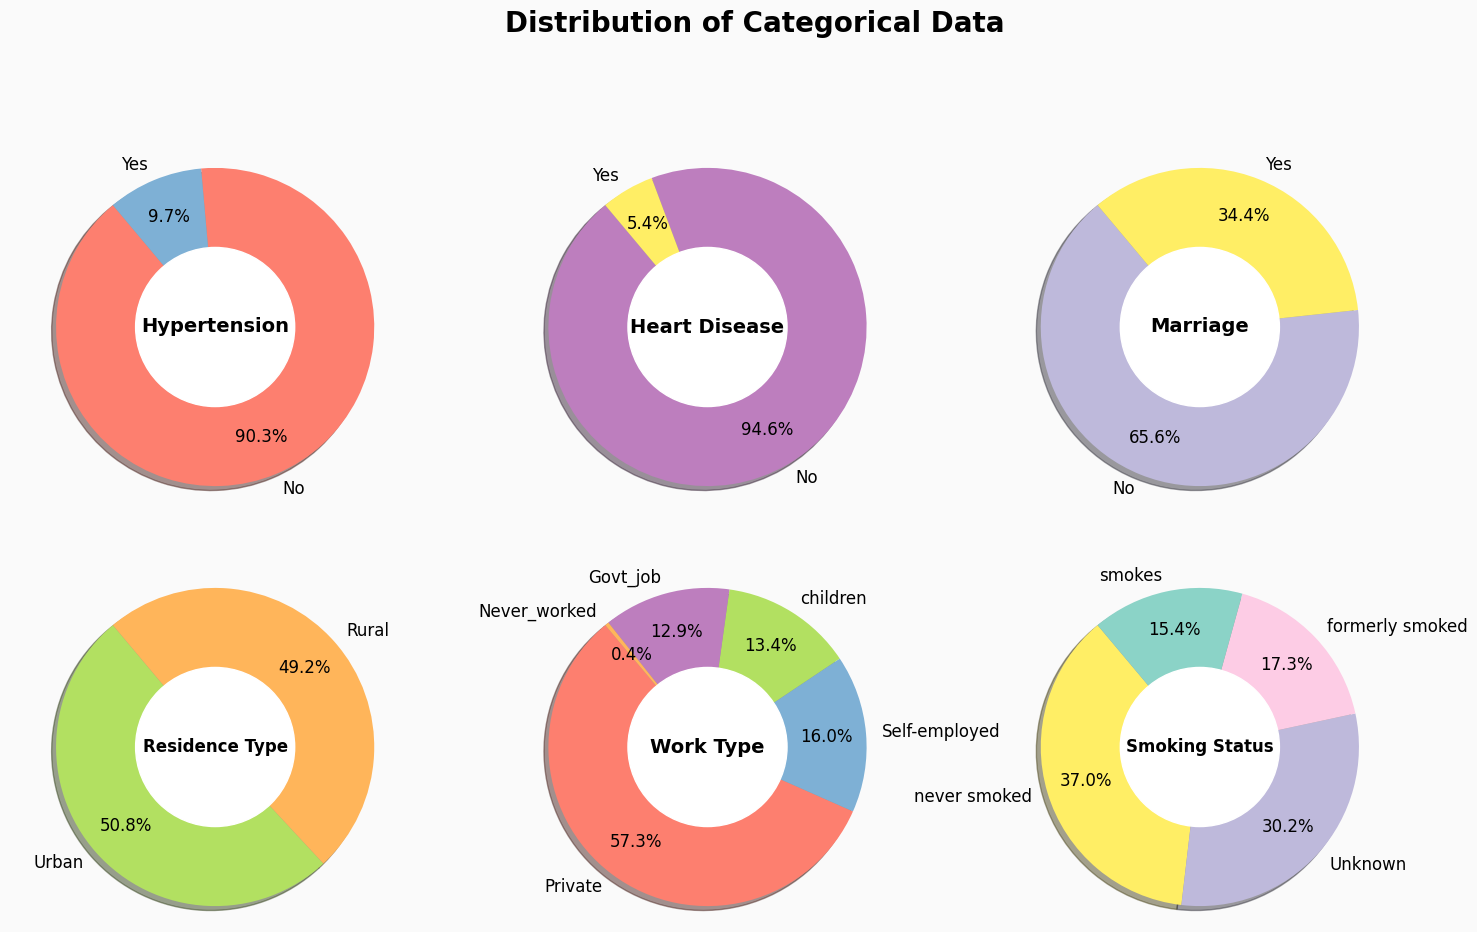

In [21]:
fig = plt.figure(figsize = (18, 10), facecolor='#fafafa')

fig.text(0.4, 1, 'Distribution of Categorical Data', {'font':'sans serif', 'weight':'bold','color': 'black', 'size': 20})

ax1 = plt.subplot2grid((2,3),(0,0))
plt.pie(hypertension.values, 
        labels = ['No', 'Yes'],  
        colors = ["#fd7f6f", "#7eb0d5"],
        autopct='%1.1f%%',
        wedgeprops=dict(width=0.5), 
        pctdistance=0.75,
        startangle=130,
        shadow = True,
        textprops={'fontsize': 12})

## Donut circle creation (by drawing white circle from the middle)
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax2 = plt.subplot2grid((2,3),(0,1))
plt.pie(heart_disease.values, 
        labels = ['No', 'Yes'],  
        colors = ["#bd7ebe", "#ffee65"],
        autopct='%1.1f%%', 
        pctdistance=0.75,
        startangle=130,
        shadow = True,
        textprops={'fontsize': 12})

## Donut circle creation (by drawing white circle from the middle)
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


ax3 = plt.subplot2grid((2,3),(0,2))
plt.pie(ever_married.values, 
        labels = ['No', 'Yes'],  
        colors = ["#beb9db", "#ffee65"],
        autopct='%1.1f%%', 
        pctdistance=0.75,
        startangle=130,
        shadow = True,
        textprops={'fontsize': 12})

## Donut circle creation (by drawing white circle from the middle)
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


ax4 = plt.subplot2grid((2,3),(1,0))
plt.pie(residence_type.values, 
        labels = residence_type.index,  
        colors = ["#b2e061", "#ffb55a"],
        autopct='%1.1f%%', 
        pctdistance=0.75,
        startangle=130,
        shadow = True,
        textprops={'fontsize': 12})

## Donut circle creation (by drawing white circle from the middle)
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


ax5 = plt.subplot2grid((2,3),(1,1))
plt.pie(work_type.values, 
        labels = work_type.index, 
        colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a"],
        autopct='%1.1f%%', 
        pctdistance=0.75,
        startangle=130,
        shadow = True,
        textprops={'fontsize': 12})

## Donut circle creation (by drawing white circle from the middle)
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


ax6 = plt.subplot2grid((2,3),(1,2))
plt.pie(smoking_status.values, 
        labels = smoking_status.index,  
        colors = ["#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"],
        autopct='%1.1f%%', 
        pctdistance=0.75,
        startangle=130,
        shadow = True,
        textprops={'fontsize': 12})

## Donut circle creation (by drawing white circle from the middle)
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# String on the donut center
ax1.text(0., 0., 'Hypertension', horizontalalignment='center', verticalalignment='center', weight='bold', fontsize=14)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.text(0., 0., 'Heart Disease', horizontalalignment='center', verticalalignment='center', weight='bold', fontsize=14)
ax2.axis('equal')  

ax3.text(0., 0., 'Marriage', horizontalalignment='center', verticalalignment='center', weight='bold', fontsize = 14)
ax3.axis('equal')  

ax4.text(0., 0., 'Residence Type', horizontalalignment='center', verticalalignment='center', weight='bold', fontsize = 12)
ax4.axis('equal')

ax5.text(0., 0., 'Work Type', horizontalalignment='center', verticalalignment='center', weight='bold', fontsize = 14)
ax5.axis('equal')  

ax6.text(0., 0., 'Smoking Status', horizontalalignment='center', verticalalignment='center', weight='bold', fontsize = 12)
ax6.axis('equal')  

In [22]:
## Adding the arrow description to the pie chart

# fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(aspect="equal"))

# labels = work_type.index
# sizes = work_type.values

# wedges, text, value = plt.pie(work_type.values, 
#                             #   labels = work_type.index, 
#                               colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a"],
#                               autopct='%1.1f%%', 
#                               pctdistance=0.75,
#                               startangle=130,
#                               shadow = True,
#                               textprops={'fontsize': 12})


# kw = dict(arrowprops=dict(arrowstyle="-"), va="center")

# pie_arrow(kw, wedges,  work_type.index)

## Bivariate Analysis

Grouping the variables into bins for visualization:

In [23]:
df_stroke['bmi_category'] = pd.cut(df_stroke['bmi'], bins = [0, 19, 25, 30, 10000], labels = ['Underweight', 'Healthy', 'Overweight', 'Obese'])
df_stroke['age_category'] = pd.cut(df_stroke['age'], bins = [0, 14, 24, 65, 200], labels = ['Children', 'Teenager', 'Adults', 'Elderly'])
df_stroke['glucose_category'] = pd.cut(df_stroke['avg_glucose_level'], bins = [0, 79, 119, 230, 500], labels = ['Low', 'Normal', 'High', 'Diabetic'])

In [24]:
df_stroke_yes = df_stroke[df_stroke['stroke'] == 1]
df_stroke_no = df_stroke[df_stroke['stroke'] == 0]
df_stroke_no = df_stroke_no[df_stroke_no['gender'] != 'Other']

In [25]:
df_stroke_yes['hypertension'] = df_stroke['hypertension'].map({1:'Yes', 0:'No'})
df_stroke_yes['heart_disease'] = df_stroke['heart_disease'].map({1:'Yes', 0:'No'})
df_stroke_no['hypertension'] = df_stroke['hypertension'].map({1:'Yes', 0:'No'})
df_stroke_no['heart_disease'] = df_stroke['heart_disease'].map({1:'Yes', 0:'No'})

C:\Users\Yuu\AppData\Local\Temp\ipykernel_12108\2621248345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke_yes['hypertension'] = df_stroke['hypertension'].map({1:'Yes', 0:'No'})
C:\Users\Yuu\AppData\Local\Temp\ipykernel_12108\2621248345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke_yes['heart_disease'] = df_stroke['heart_disease'].map({1:'Yes', 0:'No'})


1. What is the likelihood of hypertension causing stroke in patients?

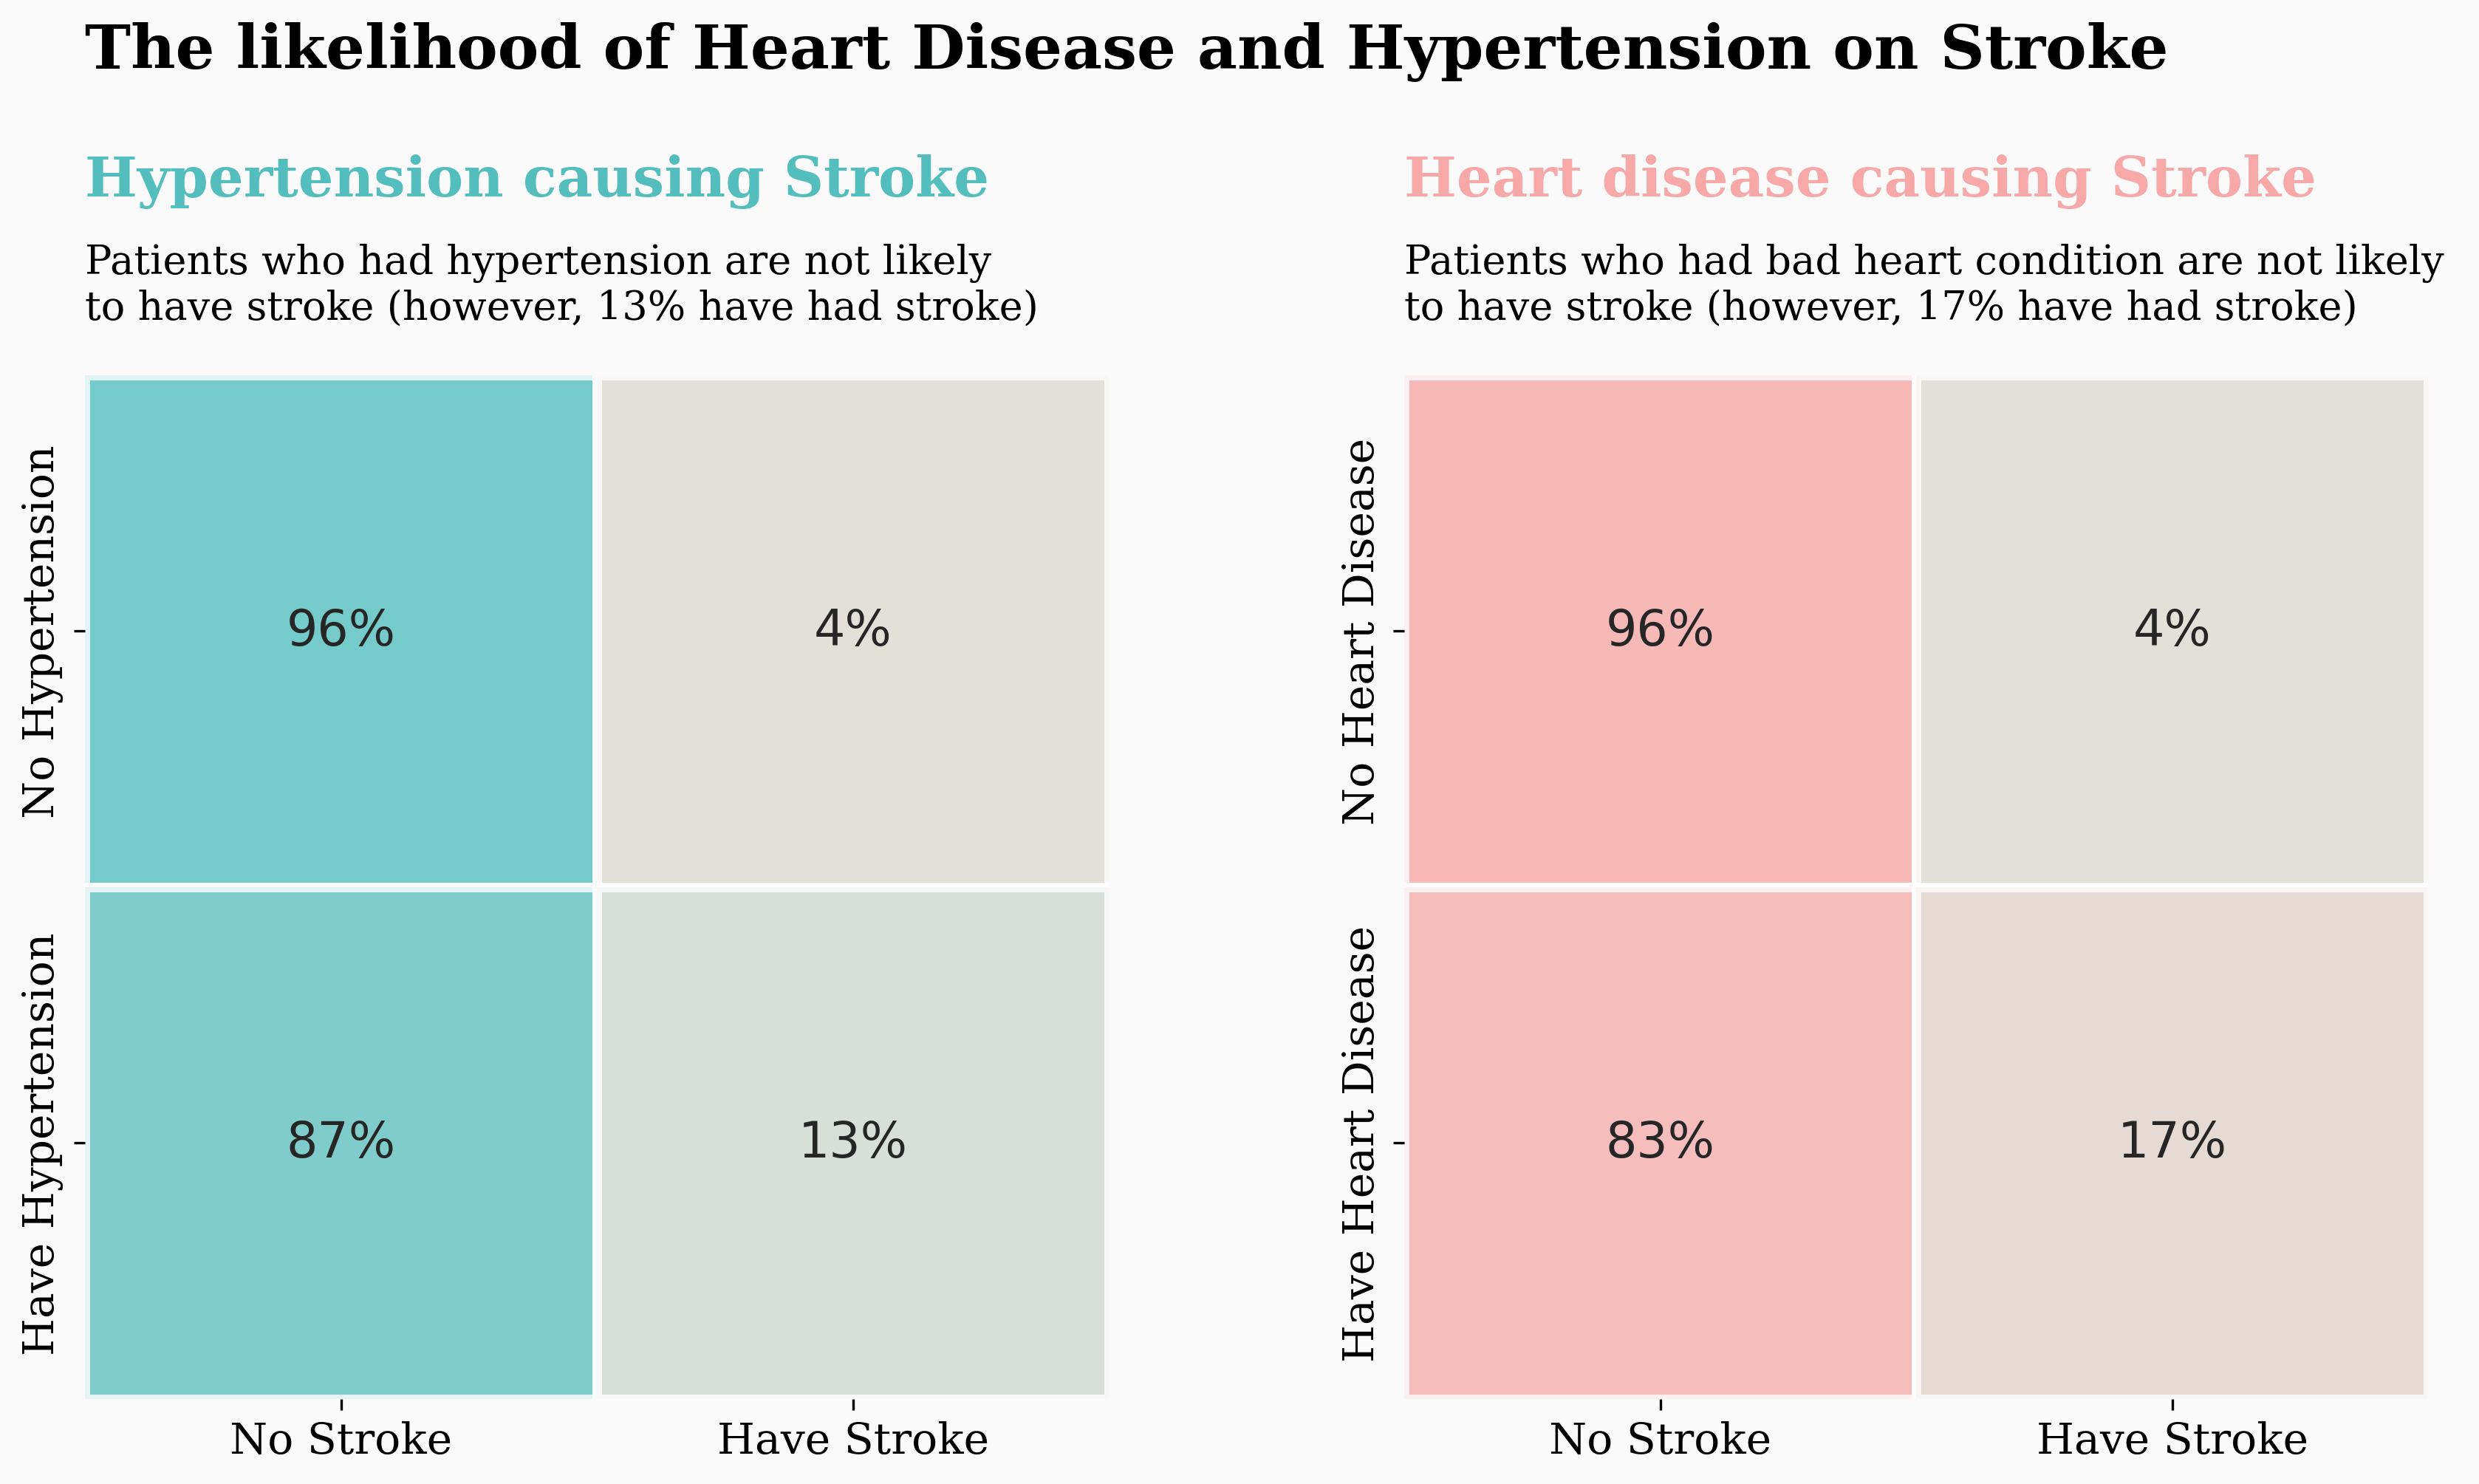

In [26]:
import matplotlib as mpl

background_color = '#fafafa'

fig = plt.figure(figsize=(15,6), dpi=300)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


#### Categorical Variables:

color1 = ["#dedad2", "#54bebe"]
color2 = ["#dedad2", "#f7a8a8"]
colormap1 = mpl.colors.LinearSegmentedColormap.from_list("", color1)
colormap2 = mpl.colors.LinearSegmentedColormap.from_list("", color2)

have_stroke = pd.crosstab(df_stroke['hypertension'], df_stroke['stroke'], normalize = 'index')
no_stroke = pd.crosstab(df_stroke['heart_disease'], df_stroke['stroke'], normalize = 'index')

sns.heatmap(ax = ax0, data = have_stroke, linewidths = 0.2, square = True, 
            cbar_kws = {"orientation": "horizontal"}, cbar=False, cmap=colormap1,
            linewidth=3, annot = True, fmt = '1.0%', annot_kws={"fontsize":16}, alpha = 0.8)

sns.heatmap(ax = ax1, data = no_stroke, linewidths = 0.2, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap2,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":16}, alpha = 0.8, )

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Main Heading
ax0.text(0, -0.6, 
         'The likelihood of Heart Disease and Hypertension on Stroke', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

## Subheading for the FIRST heatmap (Have Stroke)
ax0.text(0, -0.35, 
         'Hypertension causing Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = "#54bebe"
        )
ax0.text(0, -0.11, 
         'Patients who had hypertension are not likely \nto have stroke (however, 13% have had stroke)',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

## Subheading for the SECOND heatmap (No Stroke)
ax1.text(0, -0.35, 
         'Heart disease causing Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = '#f7a8a8'
        )
ax1.text(0, -0.11, 
         'Patients who had bad heart condition are not likely \nto have stroke (however, 17% have had stroke)', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_xticklabels(['No Stroke', 'Have Stroke'],
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')
ax1.set_xticklabels(['No Stroke', 'Have Stroke'],
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')

ax0.axes.set_yticklabels(['No Hypertension', 'Have Hypertension'], 
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)

ax1.axes.set_yticklabels(['No Heart Disease', 'Have Heart Disease'], 
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)

plt.show()


1.1) Distribution of Stroke: The impact of both Hypertension and Heart Disease 

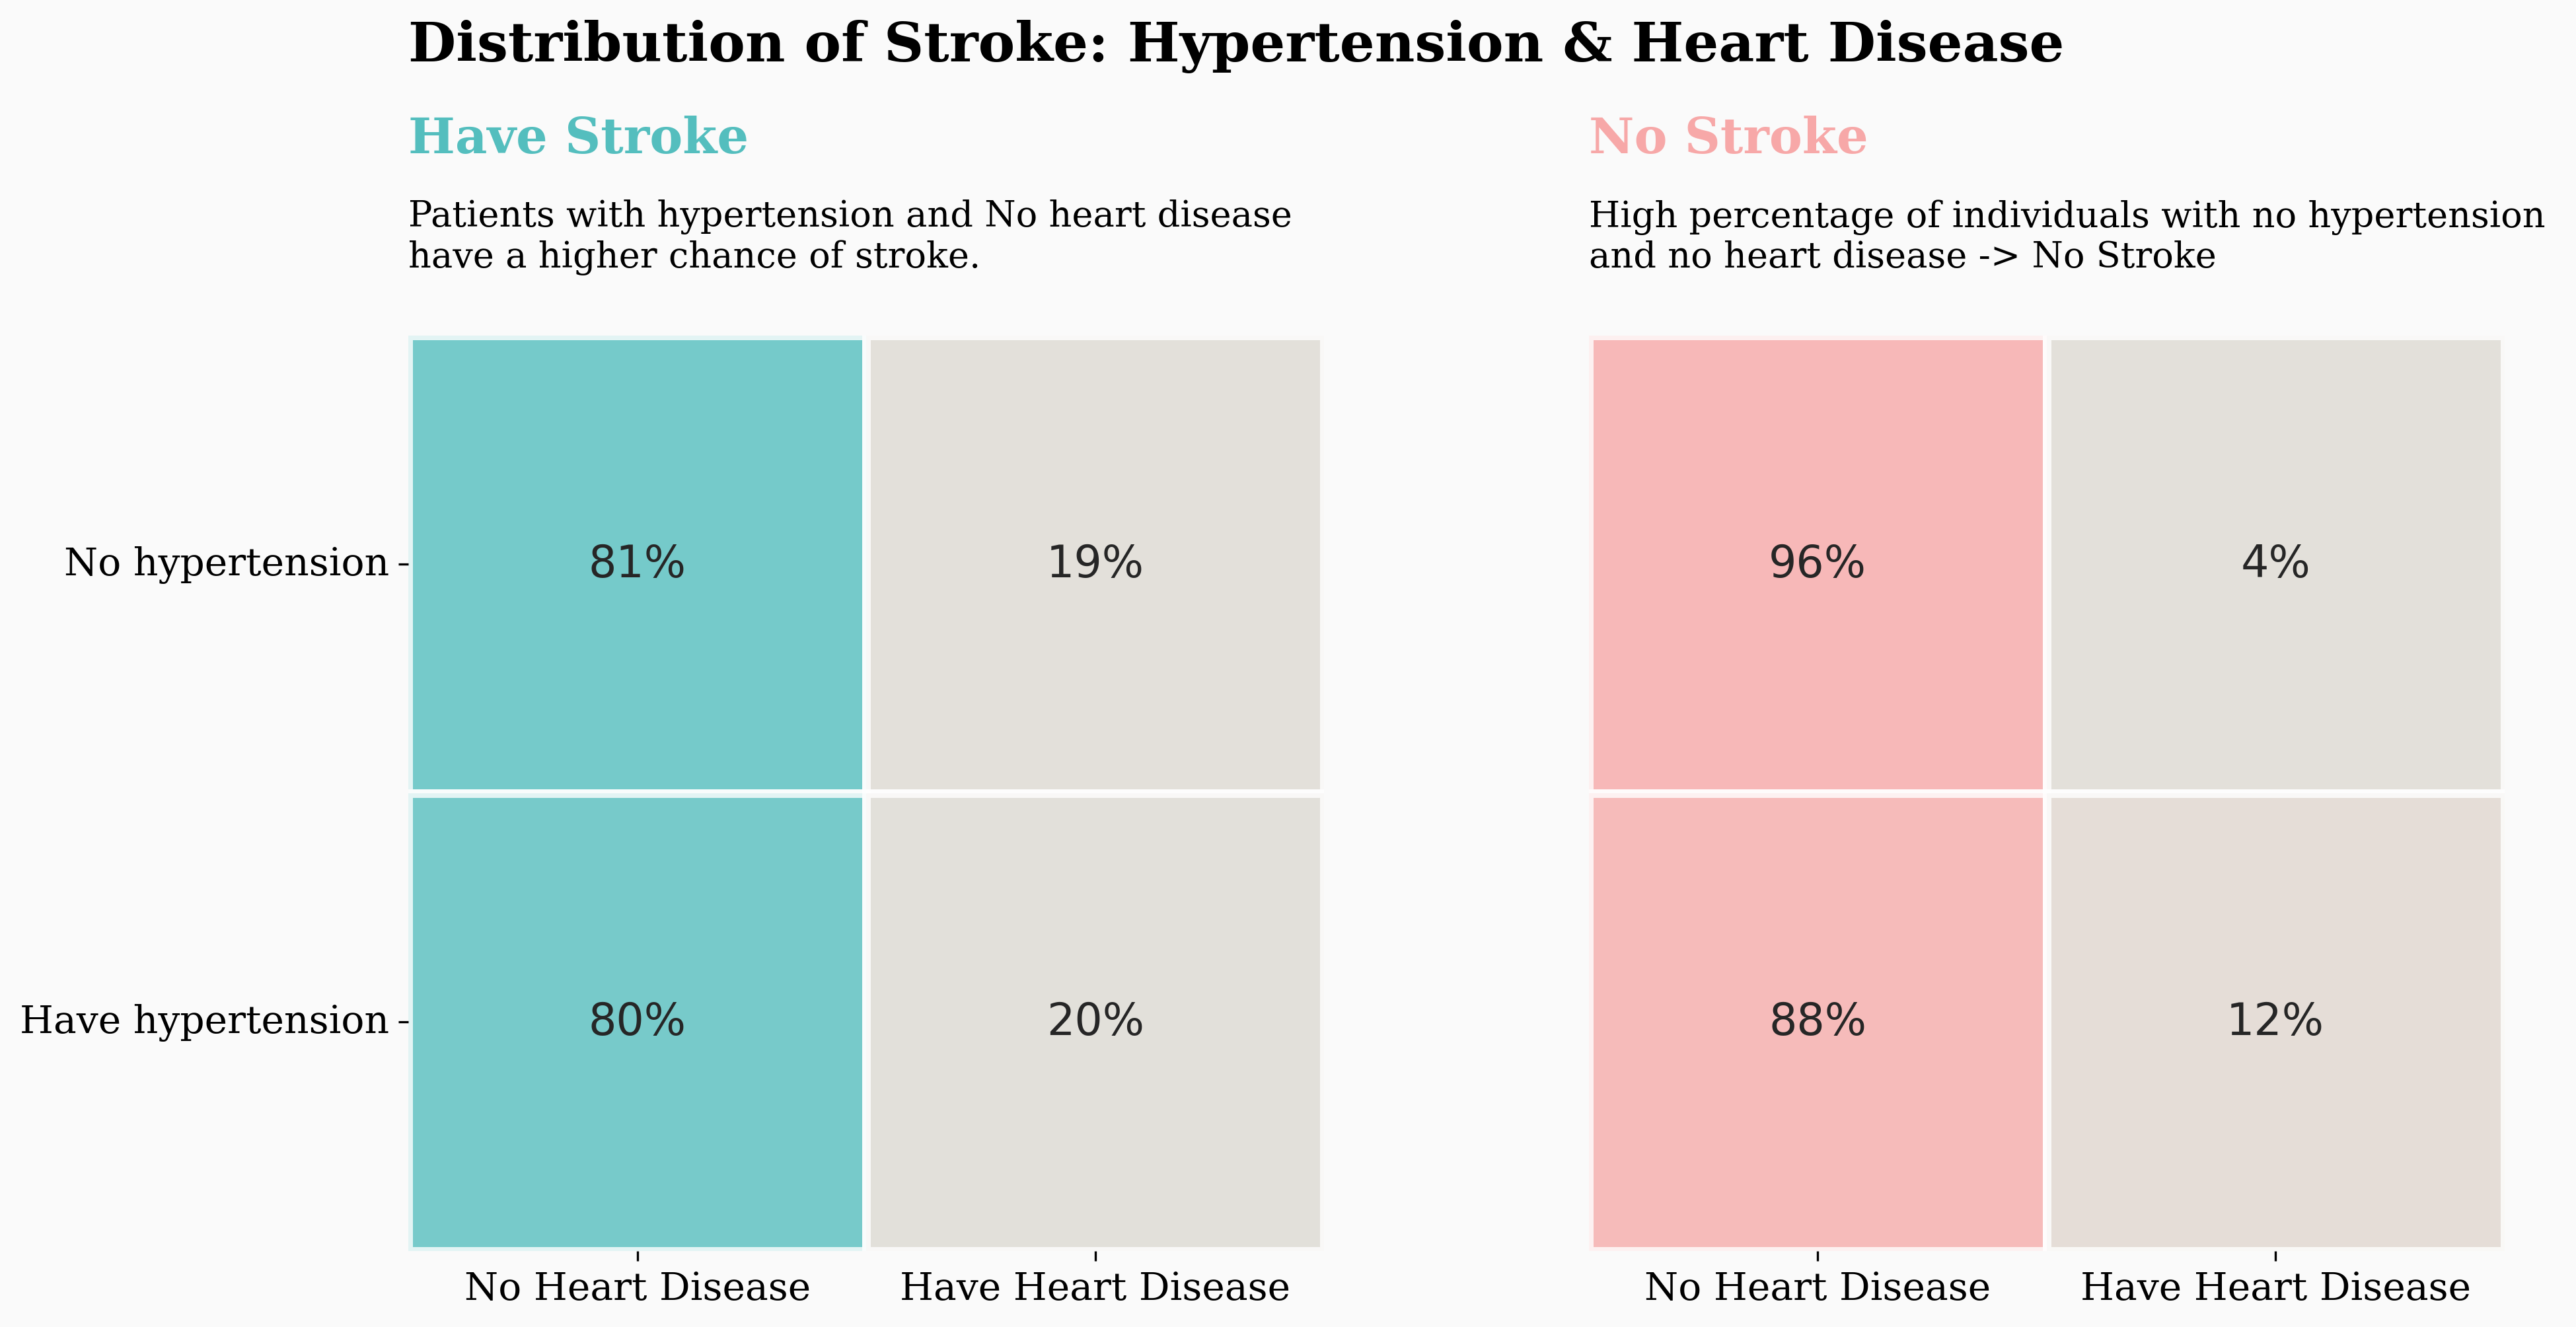

In [27]:
import matplotlib as mpl

background_color = '#fafafa'

fig = plt.figure(figsize=(15,6), dpi=300)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


#### Categorical Variables:

color1 = ["#dedad2", "#54bebe"]
color2 = ["#dedad2", "#f7a8a8"]
colormap1 = mpl.colors.LinearSegmentedColormap.from_list("", color1)
colormap2 = mpl.colors.LinearSegmentedColormap.from_list("", color2)

have_stroke = pd.crosstab(df_stroke_yes['hypertension'], [df_stroke_yes['heart_disease']], 
                          normalize = 'index')
no_stroke = pd.crosstab(df_stroke_no['hypertension'], [df_stroke_no['heart_disease']], 
                        normalize = 'index')

sns.heatmap(ax = ax0, data = have_stroke, linewidths = 0.2, square = True, 
            cbar_kws = {"orientation": "horizontal"}, cbar=False, cmap=colormap1,
            linewidth=3, annot = True, fmt = '1.0%', annot_kws={"fontsize":16}, alpha = 0.8)

sns.heatmap(ax = ax1, data = no_stroke, linewidths = 0.2, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap2,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":16}, alpha = 0.8, 
            yticklabels=False)

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Main Heading
ax0.text(0, -0.6, 
         'Distribution of Stroke: Hypertension & Heart Disease', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

## Subheading for the FIRST heatmap (Have Stroke)
ax0.text(0, -0.4, 
         'Have Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = "#54bebe"
        )
ax0.text(0, -0.15, 
         'Patients with hypertension and No heart disease \nhave a higher chance of stroke.',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

## Subheading for the SECOND heatmap (No Stroke)
ax1.text(0, -0.4, 
         'No Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = '#f7a8a8'
        )
ax1.text(0, -0.15, 
         'High percentage of individuals with no hypertension \nand no heart disease -> No Stroke', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_xticklabels(['No Heart Disease', 'Have Heart Disease'],
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')
ax1.set_xticklabels(['No Heart Disease', 'Have Heart Disease'],
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')

ax0.axes.set_yticklabels(['No hypertension', 'Have hypertension'], 
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 0)

plt.show()


2. How much does Age and Gender contribute to Stroke? 

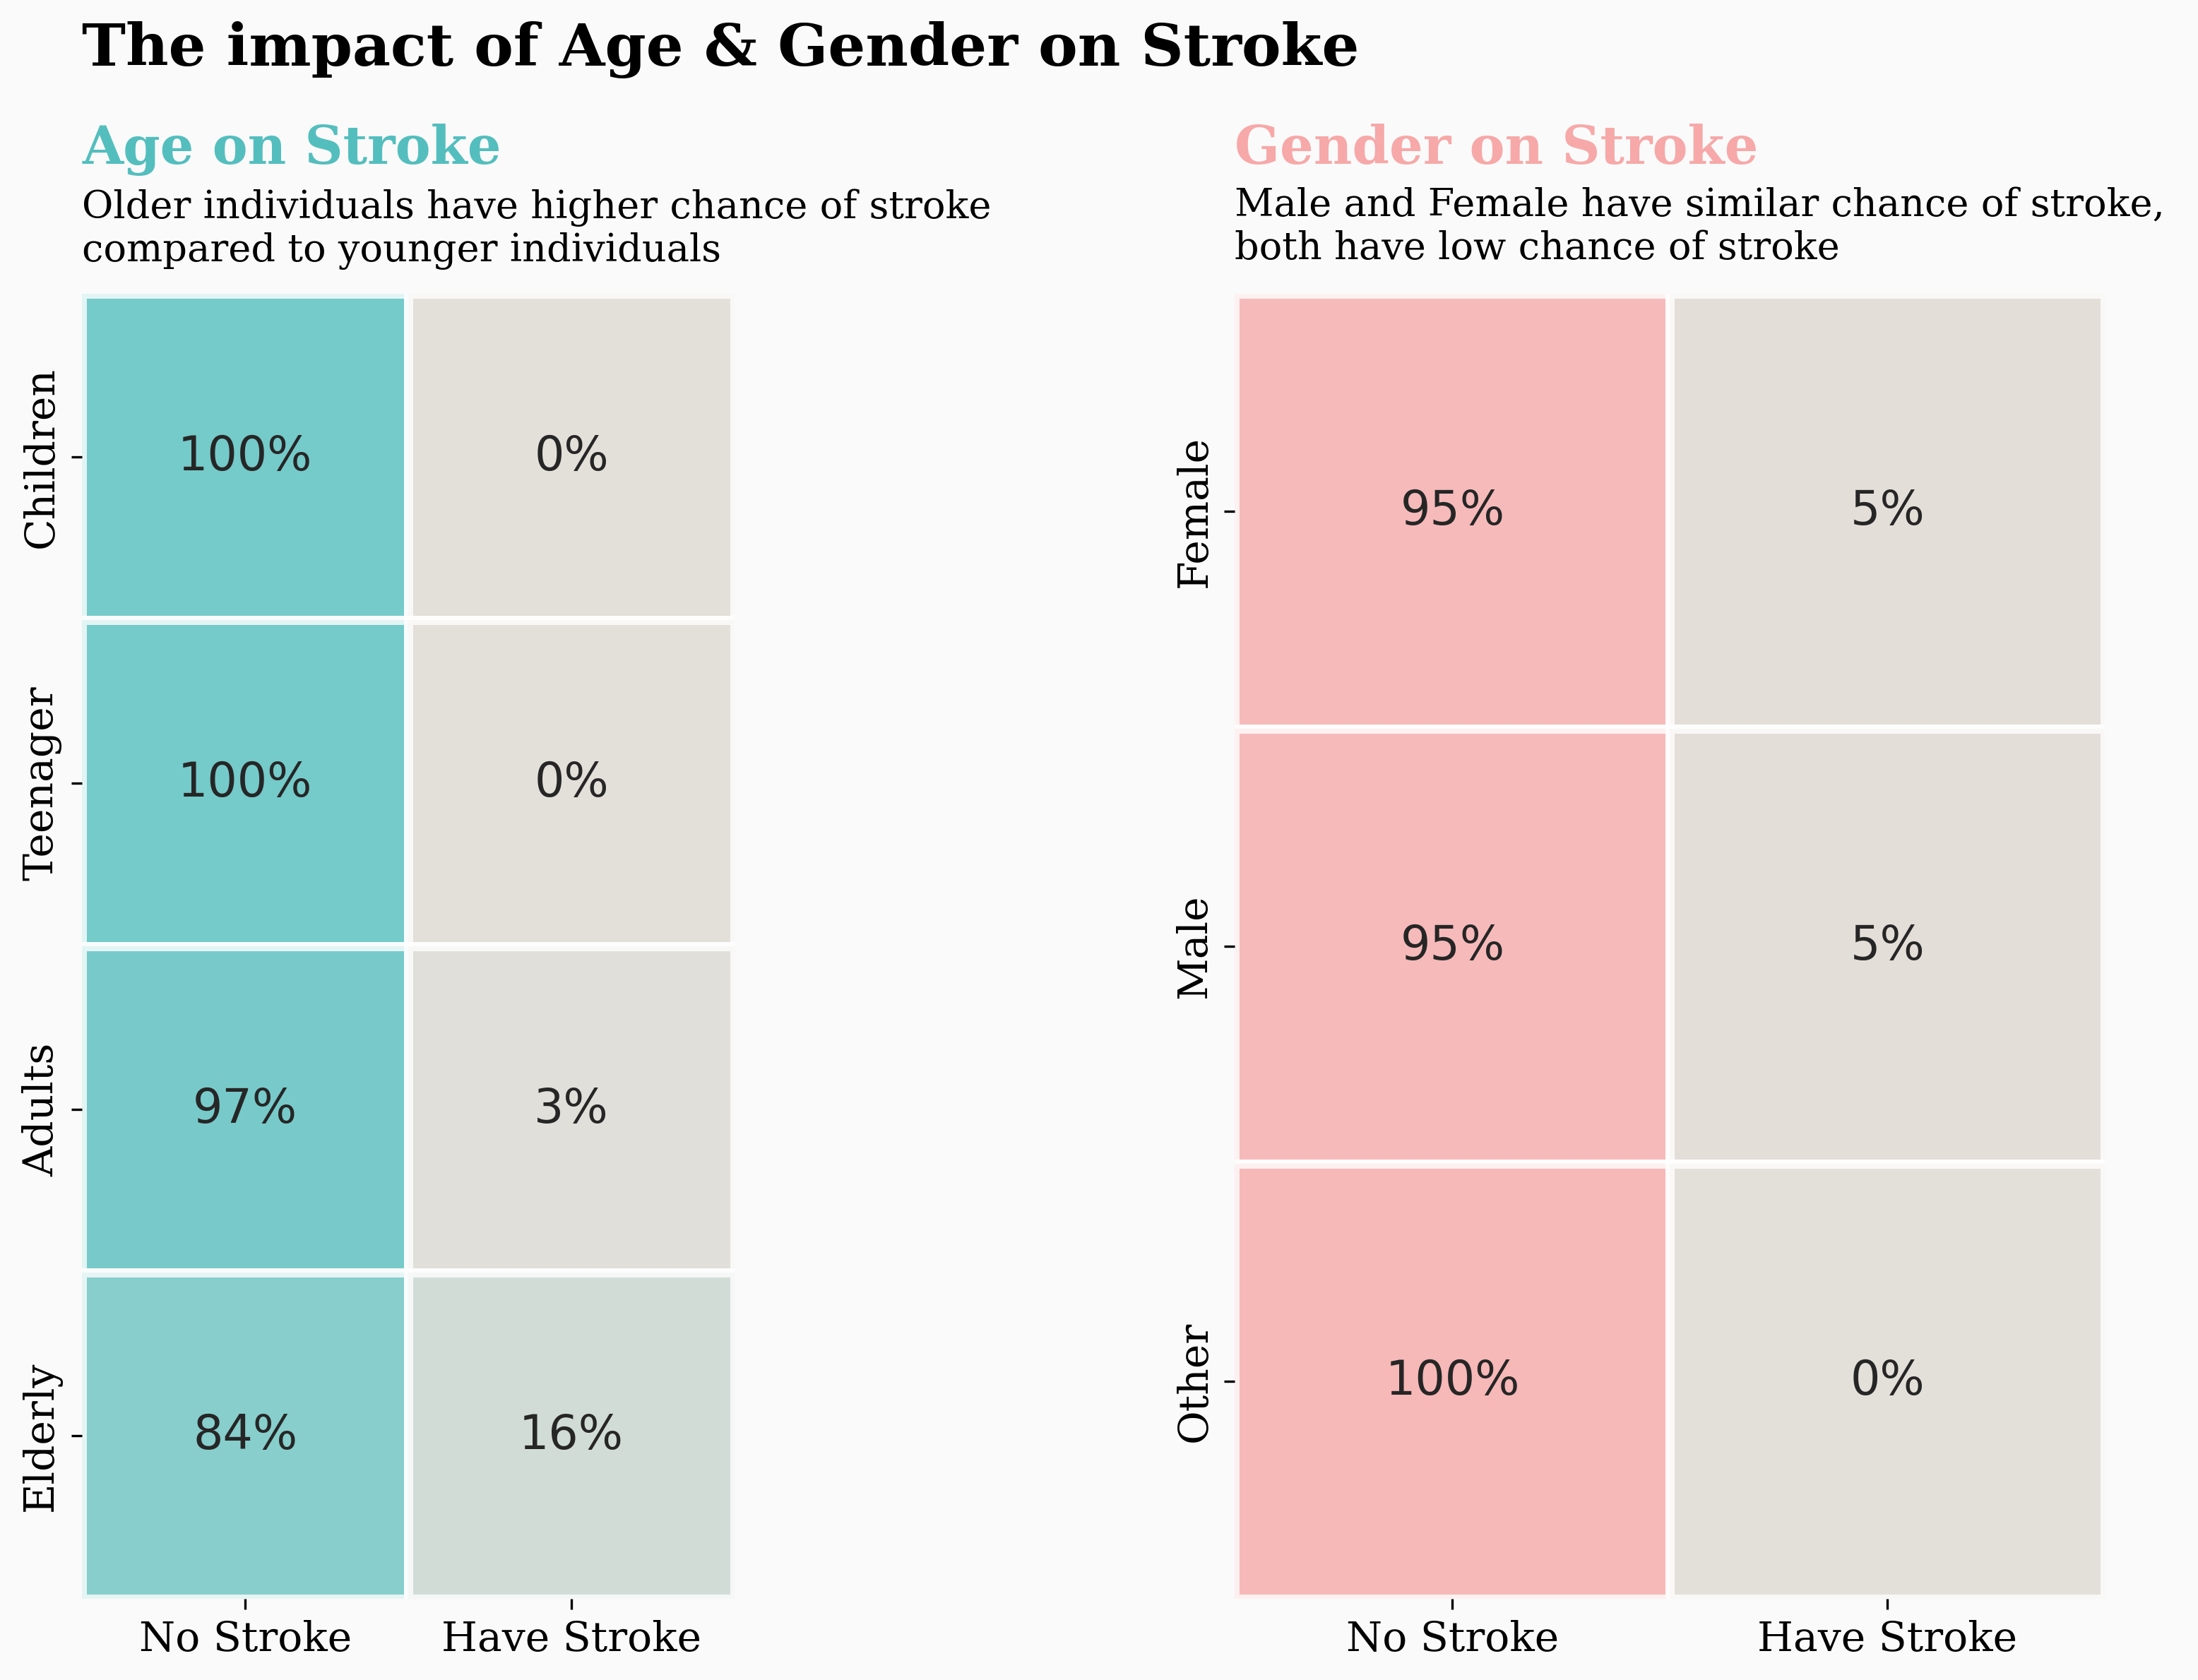

In [28]:
fig = plt.figure(figsize=(15, 8), dpi = 300)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.05, hspace = 0.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#### Variables: Age and Gender

age_order = ['Children', 'Teenager', 'Adults', 'Elderly']

color1 = ["#dedad2", "#54bebe"]
color2 = ["#dedad2", "#f7a8a8"]
colormap1 = mpl.colors.LinearSegmentedColormap.from_list("", color1)
colormap2 = mpl.colors.LinearSegmentedColormap.from_list("", color2)

age = pd.crosstab(df_stroke['age_category'], [df_stroke['stroke']], 
                          normalize = 'index')
gender = pd.crosstab(df_stroke['gender'], [df_stroke['stroke']], 
                        normalize = 'index')

sns.heatmap(ax = ax0, data = age, linewidths = 0.2, square = True, 
            cbar_kws = {"orientation": "horizontal"}, cbar=False, cmap=colormap1,
            linewidth = 3, annot = True, fmt = '1.0%', annot_kws={"fontsize":16}, alpha = 0.8)

sns.heatmap(ax = ax1, data = gender, linewidths = 0.2, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap2,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":16}, alpha = 0.8, 
            )

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Main Heading
ax0.text(0, -0.7, 
         'The impact of Age & Gender on Stroke', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

## Subheading for the FIRST heatmap (Have Stroke)
ax0.text(0, -0.4, 
         'Age on Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = "#54bebe"
        )
ax0.text(0, -0.10, 
         'Older individuals have higher chance of stroke \ncompared to younger individuals',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

## Subheading for the SECOND heatmap (No Stroke)
ax1.text(0, -0.3, 
         'Gender on Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = '#f7a8a8'
        )
ax1.text(0, -0.08, 
         'Male and Female have similar chance of stroke, \nboth have low chance of stroke ', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_xticklabels(['No Stroke', 'Have Stroke'],
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')
ax1.set_xticklabels(['No Stroke', 'Have Stroke'],
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')

ax0.axes.set_yticklabels(age_order,
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)
ax1.axes.set_yticklabels(['Female', 'Male', 'Other'], 
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)

plt.show()

In [29]:
gender_order = ['Female','Male']
age_order = ['Children', 'Adults', 'Elderly']

pd.crosstab(df_stroke_yes['age_category'], [df_stroke_yes['gender']], 
                          normalize = 'index').loc[age_order, gender_order]

gender,Female,Male
age_category,,
Children,1.000000,0.000000
Adults,0.527473,0.472527
Elderly,0.583333,0.416667


2.1) Distribution of Stroke : Age & Gender

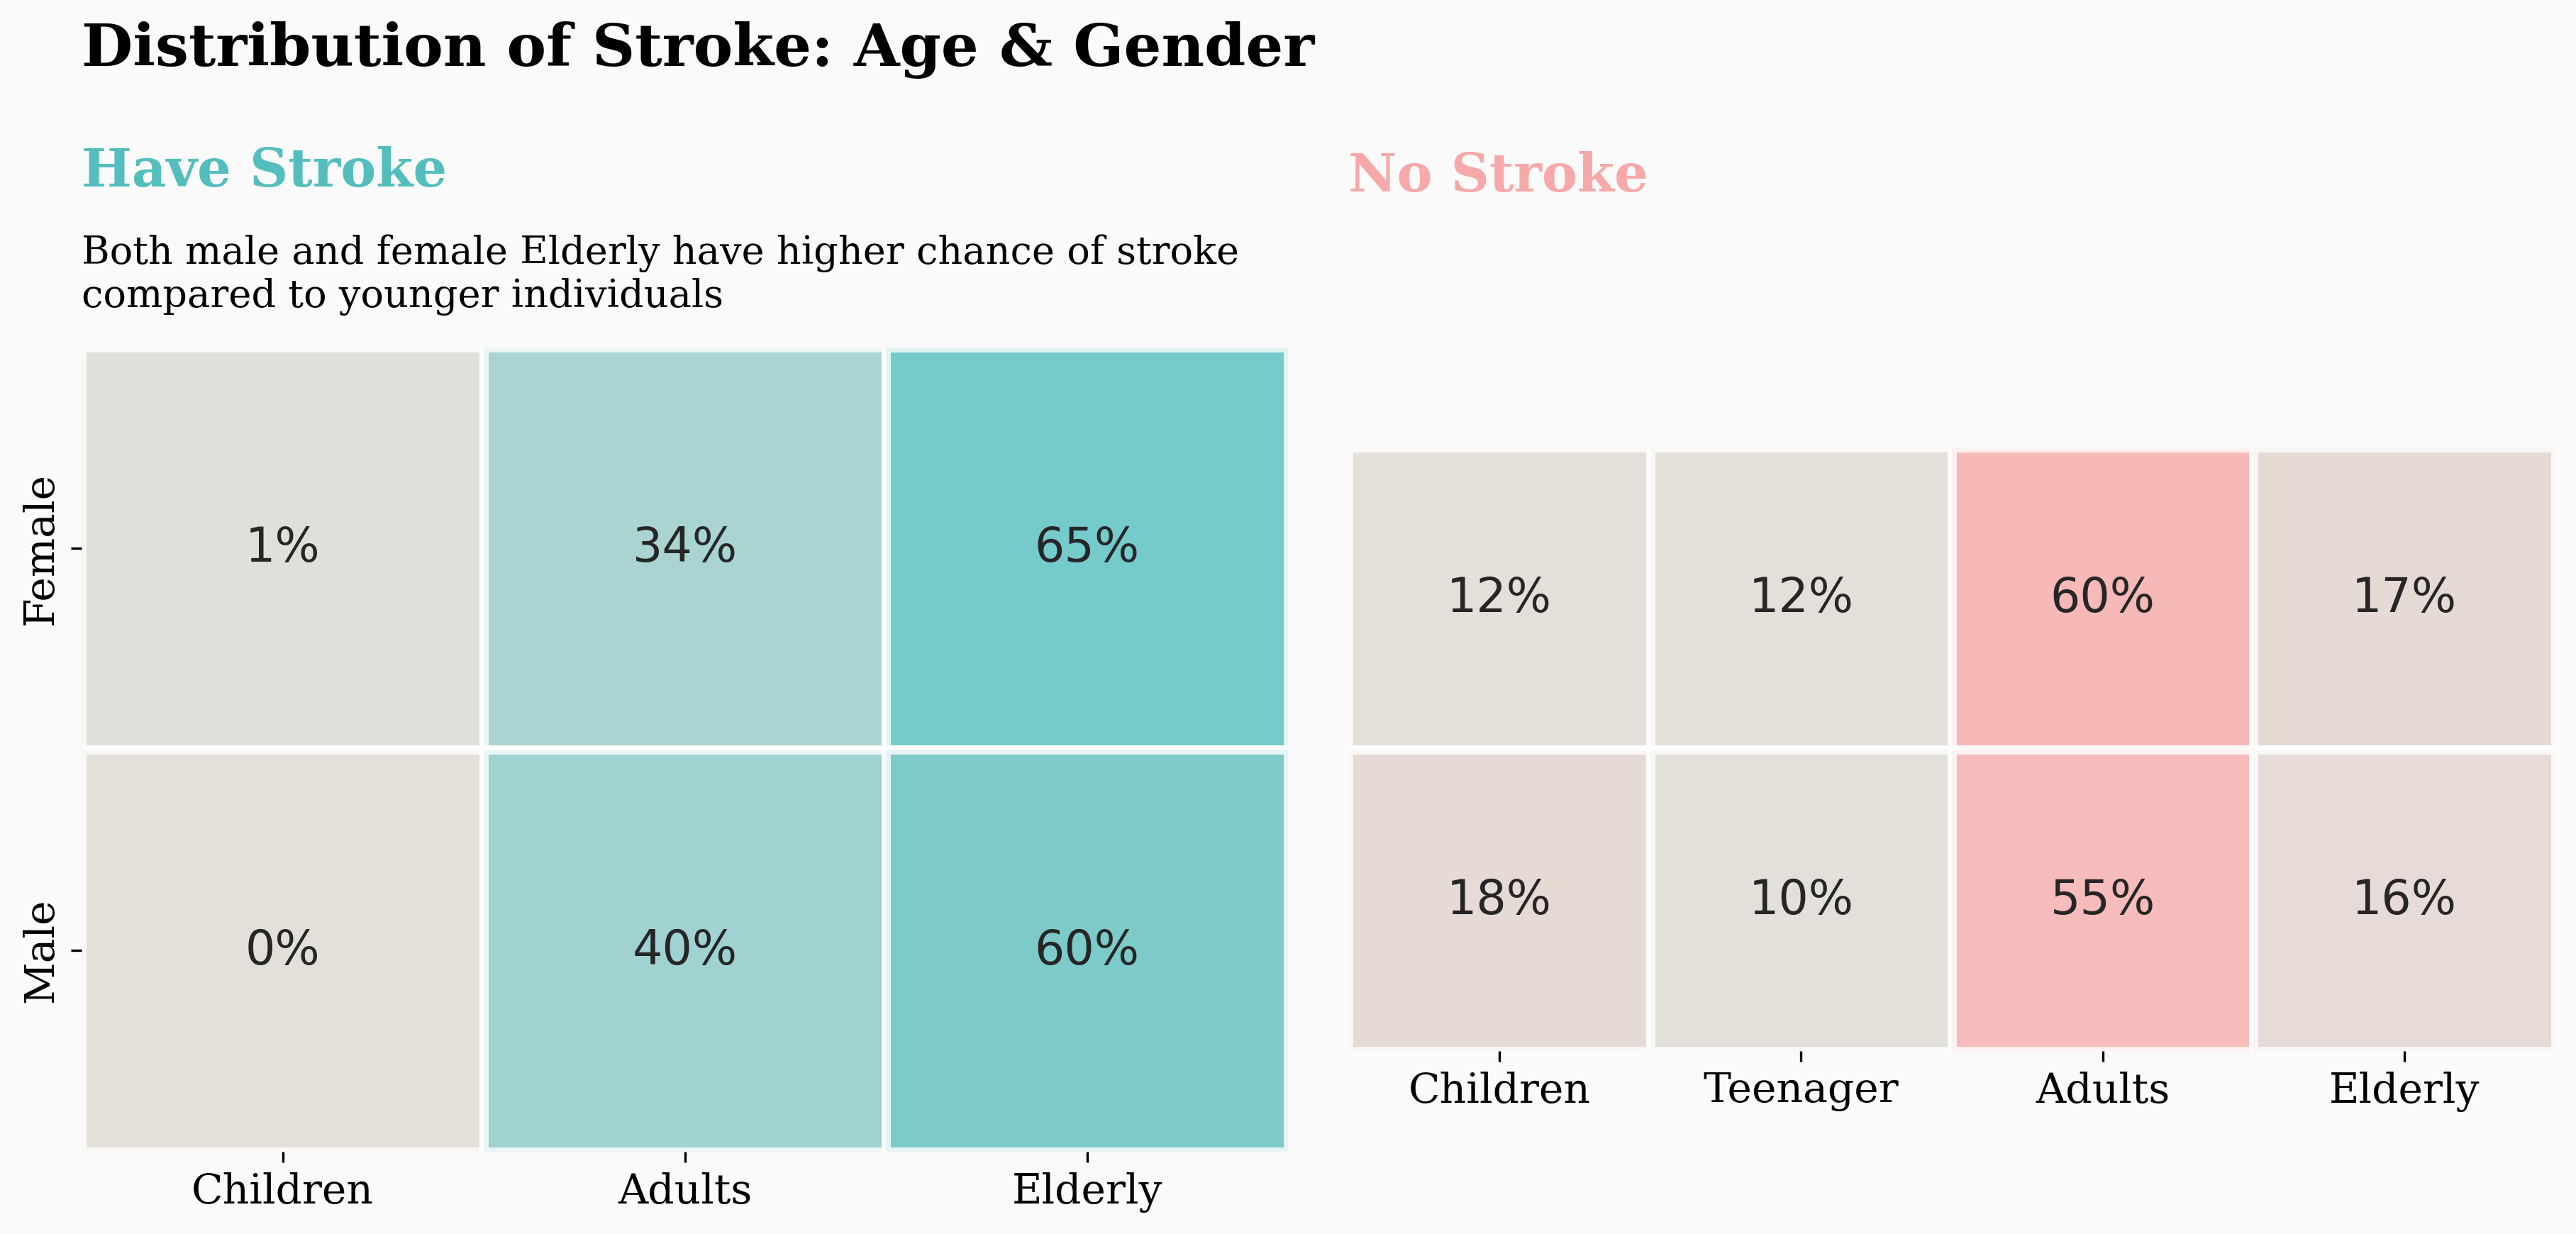

In [30]:
fig = plt.figure(figsize=(15, 8), dpi = 300)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.05, hspace = 0.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#### Variables: Age and Gender

gender_order = ['Female', 'Male']
age_order_yes = ['Children', 'Adults', 'Elderly']
age_order_no = ['Children', 'Teenager', 'Adults', 'Elderly']

color1 = ["#dedad2", "#54bebe"]
color2 = ["#dedad2", "#f7a8a8"]
colormap1 = mpl.colors.LinearSegmentedColormap.from_list("", color1)
colormap2 = mpl.colors.LinearSegmentedColormap.from_list("", color2)

have_stroke = pd.crosstab(df_stroke_yes['gender'], [df_stroke_yes['age_category']], 
                          normalize = 'index').loc[gender_order, age_order]
no_stroke = pd.crosstab(df_stroke_no['gender'], [df_stroke_no['age_category']], 
                        normalize = 'index').loc[gender_order, age_order_no]

sns.heatmap(ax = ax0, data = have_stroke, linewidths = 0.2, square = True, 
            cbar_kws = {"orientation": "horizontal"}, cbar=False, cmap=colormap1,
            linewidth = 3, annot = True, fmt = '1.0%', annot_kws={"fontsize":16}, alpha = 0.8)

sns.heatmap(ax = ax1, data = no_stroke, linewidths = 0.2, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap2,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":16}, alpha = 0.8, 
            yticklabels=False)

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Main Heading
ax0.text(0, -0.7, 
         'Distribution of Stroke: Age & Gender', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

## Subheading for the FIRST heatmap (Have Stroke)
ax0.text(0, -0.4, 
         'Have Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = "#54bebe"
        )
ax0.text(0, -0.10, 
         'Both male and female Elderly have higher chance of stroke \ncompared to younger individuals',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

## Subheading for the SECOND heatmap (No Stroke)
ax1.text(0, -0.85, 
         'No Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = '#f7a8a8'
        )
ax1.text(0, -0.45, 
         '',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_xticklabels(age_order,
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')
ax1.set_xticklabels(age_order_no,
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')

ax0.axes.set_yticklabels(gender_order,
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)

plt.show()

3. What is the likelihood of marriage causing stroke in patients? 

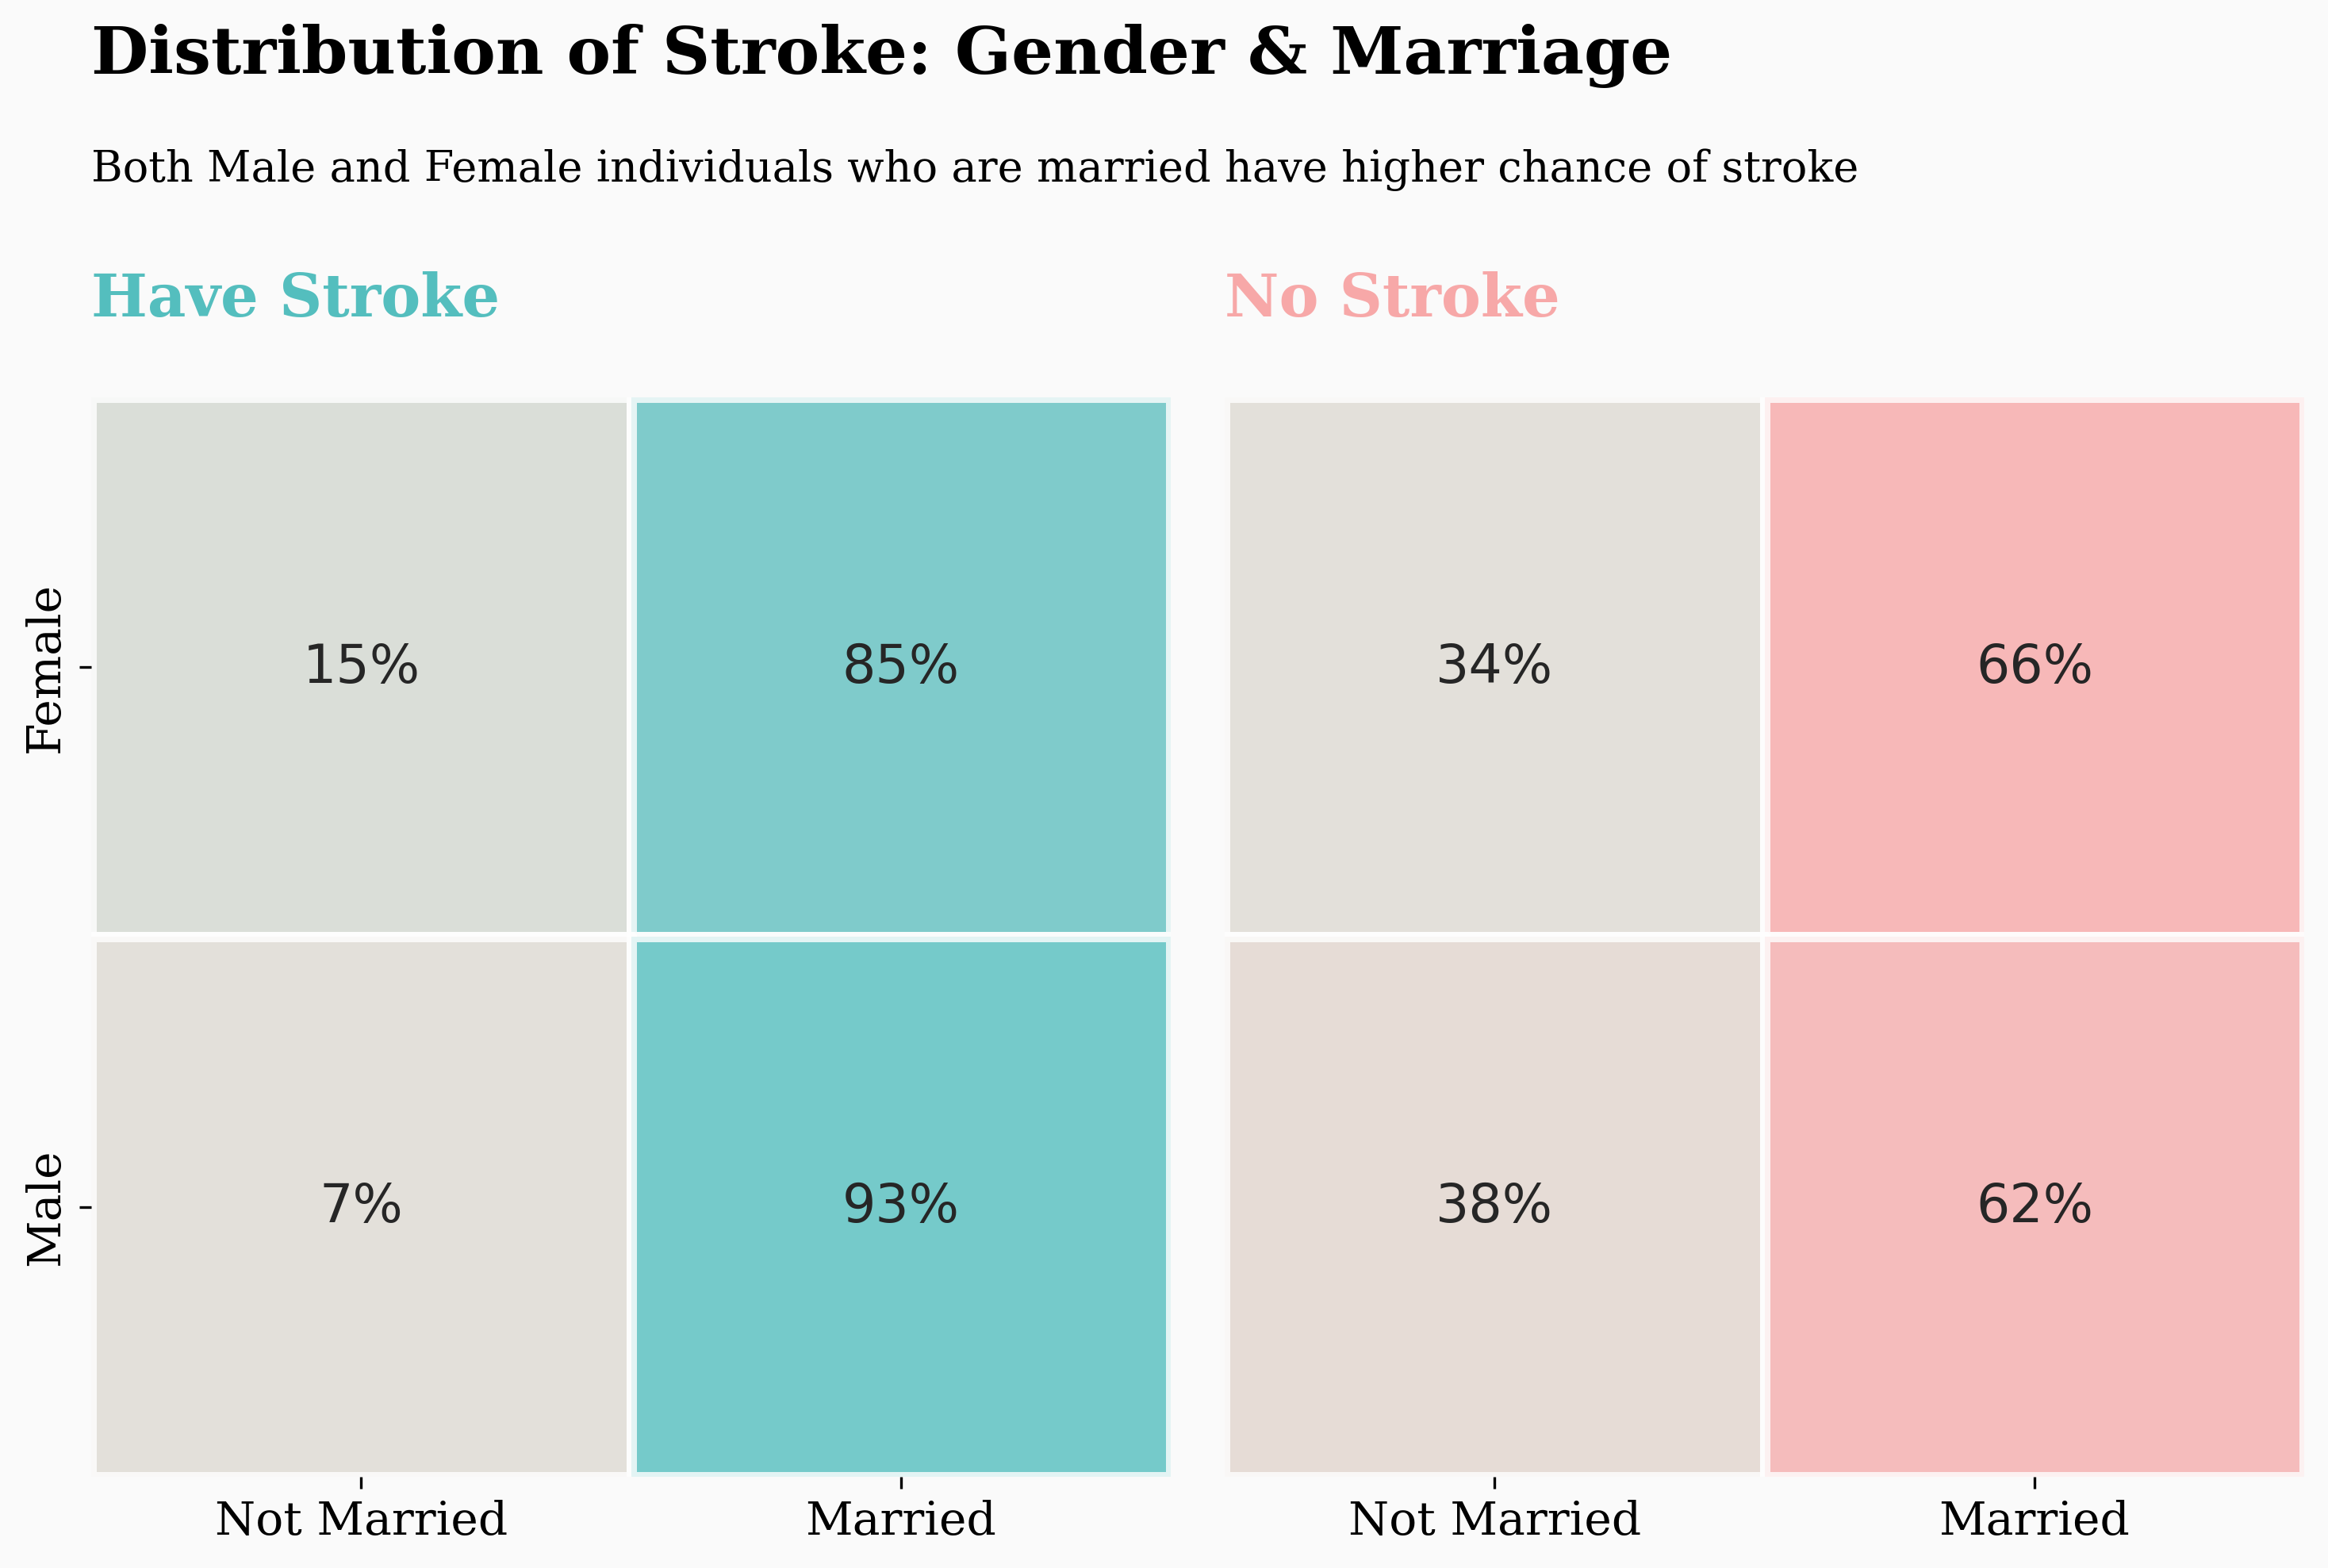

In [31]:
fig = plt.figure(figsize=(12, 8), dpi = 300)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.05, hspace = 0.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#### Variables: Gender and Marriage

color1 = ["#dedad2", "#54bebe"]
color2 = ["#dedad2", "#f7a8a8"]
colormap1 = mpl.colors.LinearSegmentedColormap.from_list("", color1)
colormap2 = mpl.colors.LinearSegmentedColormap.from_list("", color2)

have_stroke = pd.crosstab(df_stroke_yes['gender'], [df_stroke_yes['ever_married']], 
                          normalize = 'index')
no_stroke = pd.crosstab(df_stroke_no['gender'], [df_stroke_no['ever_married']], 
                        normalize = 'index')

sns.heatmap(ax = ax0, data = have_stroke, linewidths = 0.2, square = True, 
            cbar_kws = {"orientation": "horizontal"}, cbar=False, cmap=colormap1,
            linewidth = 3, annot = True, fmt = '1.0%', annot_kws={"fontsize":16}, alpha = 0.8)

sns.heatmap(ax = ax1, data = no_stroke, linewidths = 0.2, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap2,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":16}, alpha = 0.8, 
            yticklabels=False)

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Main Heading
ax0.text(0, -0.6, 
         'Distribution of Stroke: Gender & Marriage', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

## Subheading for the FIRST heatmap (Have Stroke)
ax0.text(0, -0.15, 
         'Have Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = "#54bebe"
        )
ax0.text(0, -0.4,
         'Both Male and Female individuals who are married have higher chance of stroke',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

## Subheading for the SECOND heatmap (No Stroke)
ax1.text(0, -0.15, 
         'No Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = '#f7a8a8'
        )
ax1.text(0, -0.15, 
         '', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_xticklabels(['Not Married', 'Married'],
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')
ax1.set_xticklabels(['Not Married', 'Married'],
                    fontsize = 14,
                    fontfamily='serif',
                    color = 'black')

ax0.axes.set_yticklabels(['Female', 'Male'],
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)

plt.show()

4. What is the likelihood of different work types causing stroke in patients?

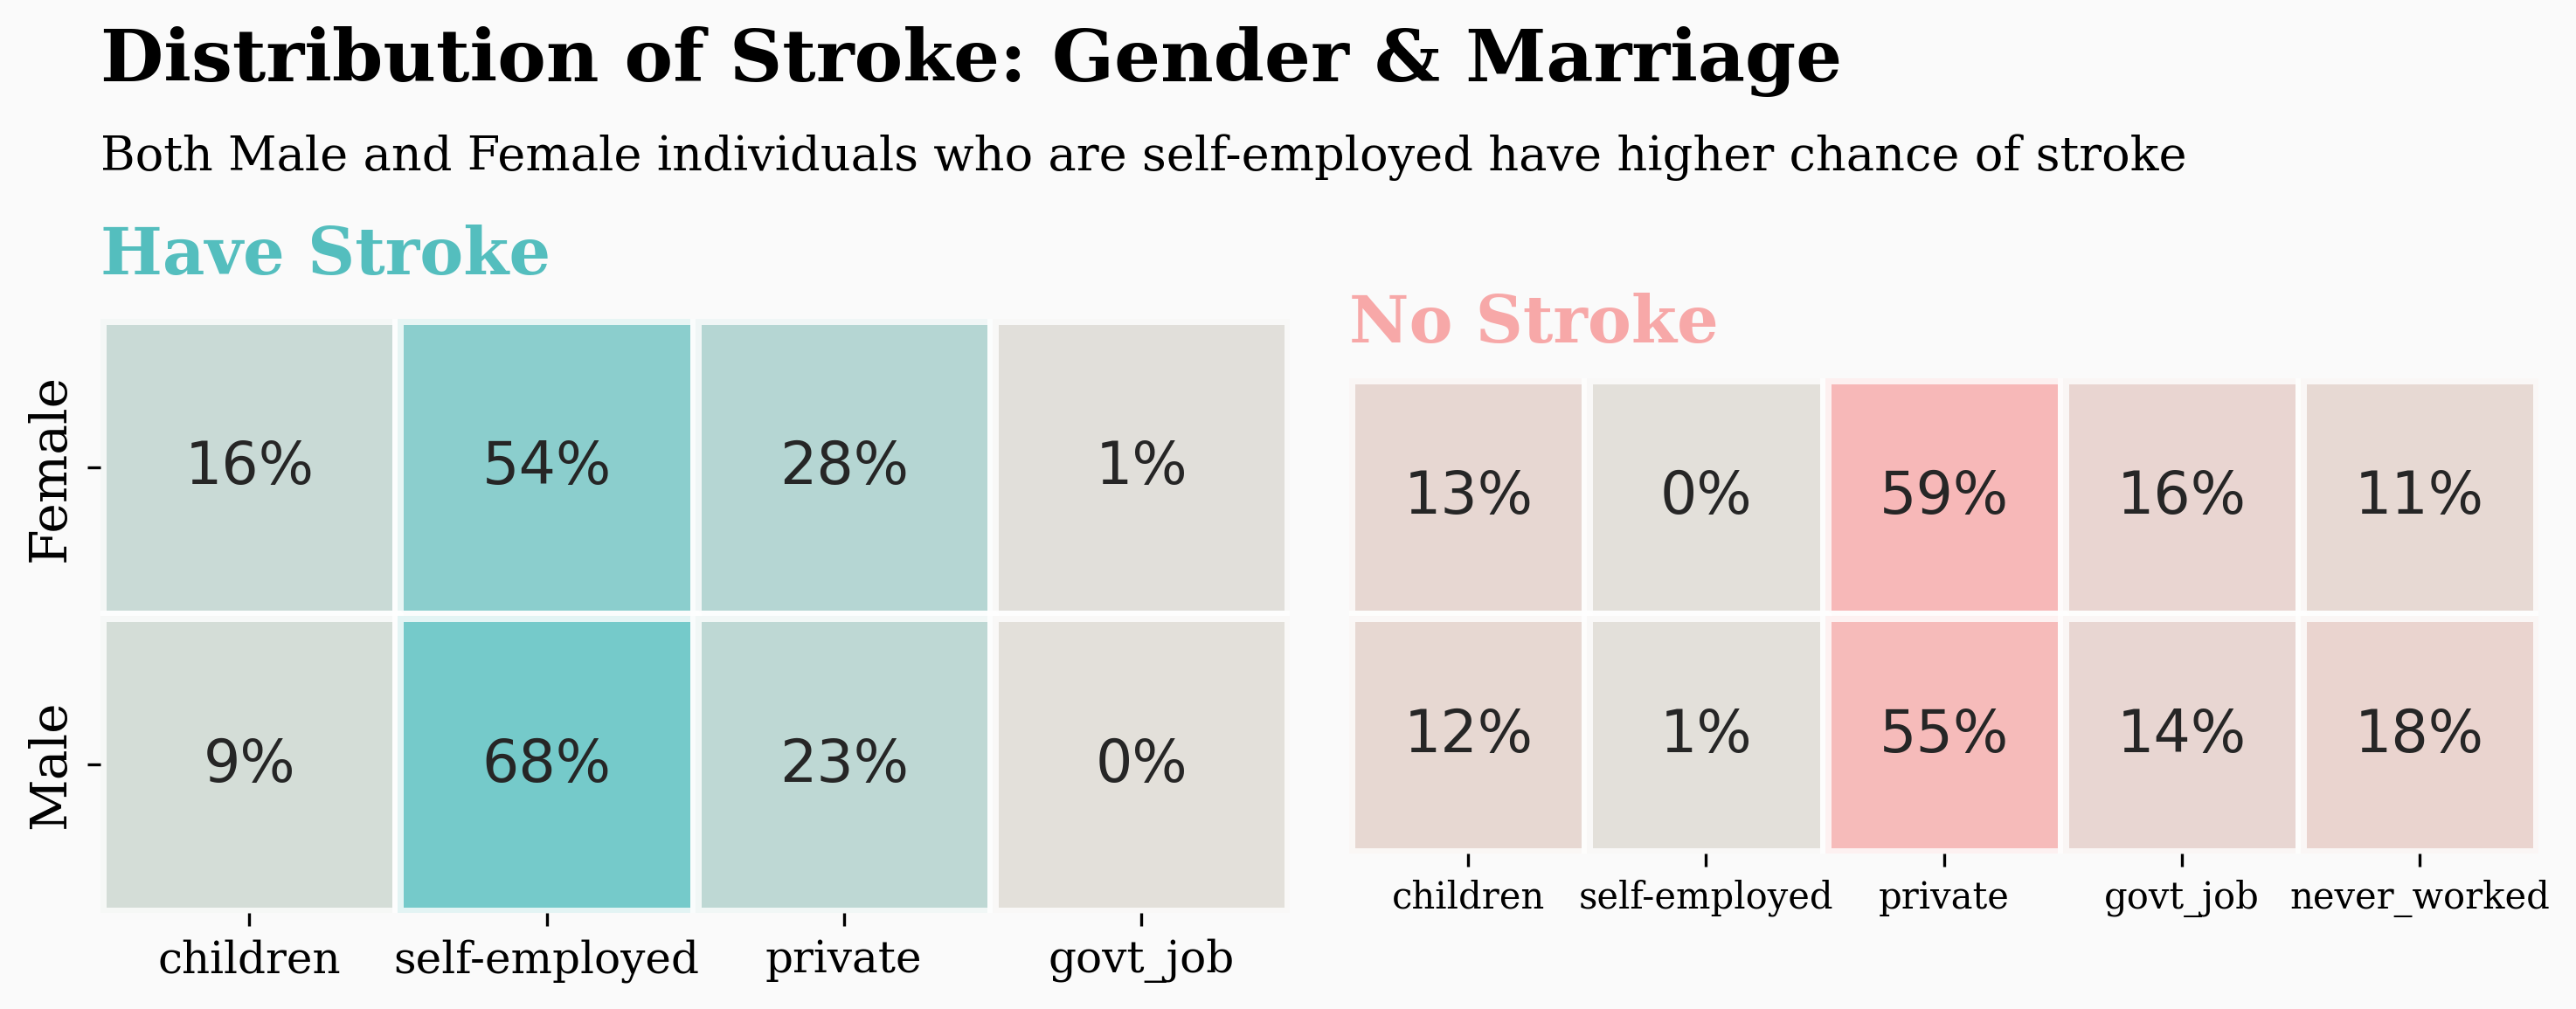

In [32]:
fig = plt.figure(figsize=(12, 8), dpi = 300)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.05, hspace = 0.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#### Variables: Gender and Marriage

color1 = ["#dedad2", "#54bebe"]
color2 = ["#dedad2", "#f7a8a8"]
colormap1 = mpl.colors.LinearSegmentedColormap.from_list("", color1)
colormap2 = mpl.colors.LinearSegmentedColormap.from_list("", color2)

have_stroke = pd.crosstab(df_stroke_yes['gender'], [df_stroke_yes['work_type']], 
                          normalize = 'index')
no_stroke = pd.crosstab(df_stroke_no['gender'], [df_stroke_no['work_type']], 
                        normalize = 'index')

sns.heatmap(ax = ax0, data = have_stroke, linewidths = 0.2, square = True, 
            cbar_kws = {"orientation": "horizontal"}, cbar=False, cmap=colormap1,
            linewidth = 3, annot = True, fmt = '1.0%', annot_kws={"fontsize":16}, alpha = 0.8)

sns.heatmap(ax = ax1, data = no_stroke, linewidths = 0.2, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap2,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":16}, alpha = 0.8, 
            yticklabels=False)

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Main Heading
ax0.text(0, -0.8, 
         'Distribution of Stroke: Gender & Marriage', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

## Subheading for the FIRST heatmap (Have Stroke)
ax0.text(0, -0.15, 
         'Have Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = "#54bebe"
        )
ax0.text(0, -0.5,
         'Both Male and Female individuals who are self-employed have higher chance of stroke',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

## Subheading for the SECOND heatmap (No Stroke)
ax1.text(0, -0.15, 
         'No Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = '#f7a8a8'
        )
ax1.text(0, -0.15, 
         '', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_xticklabels(['children', 'self-employed', 'private', 'govt_job'],
                    fontsize = 12,
                    fontfamily='serif',
                    color = 'black')
ax1.set_xticklabels(['children', 'self-employed', 'private', 'govt_job', 'never_worked'],
                    fontsize = 10,
                    fontfamily='serif',
                    color = 'black')

ax0.axes.set_yticklabels(['Female', 'Male'],
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)

plt.show()

In [33]:
df_stroke_yes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_category,glucose_category
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese,Elderly,High
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN,Adults,High
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese,Elderly,Normal
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,Obese,Adults,High
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Healthy,Elderly,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,No,No,Yes,Private,Rural,84.96,36.7,Unknown,1,Obese,Adults,Normal
245,49669,Female,14.0,No,No,No,children,Rural,57.93,30.9,Unknown,1,Obese,Children,Low
246,27153,Female,75.0,No,No,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,Overweight,Elderly,Low
247,34060,Male,71.0,Yes,No,Yes,Self-employed,Rural,87.80,NaN,Unknown,1,NaN,Elderly,Normal


5. What does living in different residential type contributes to stroke in patients?

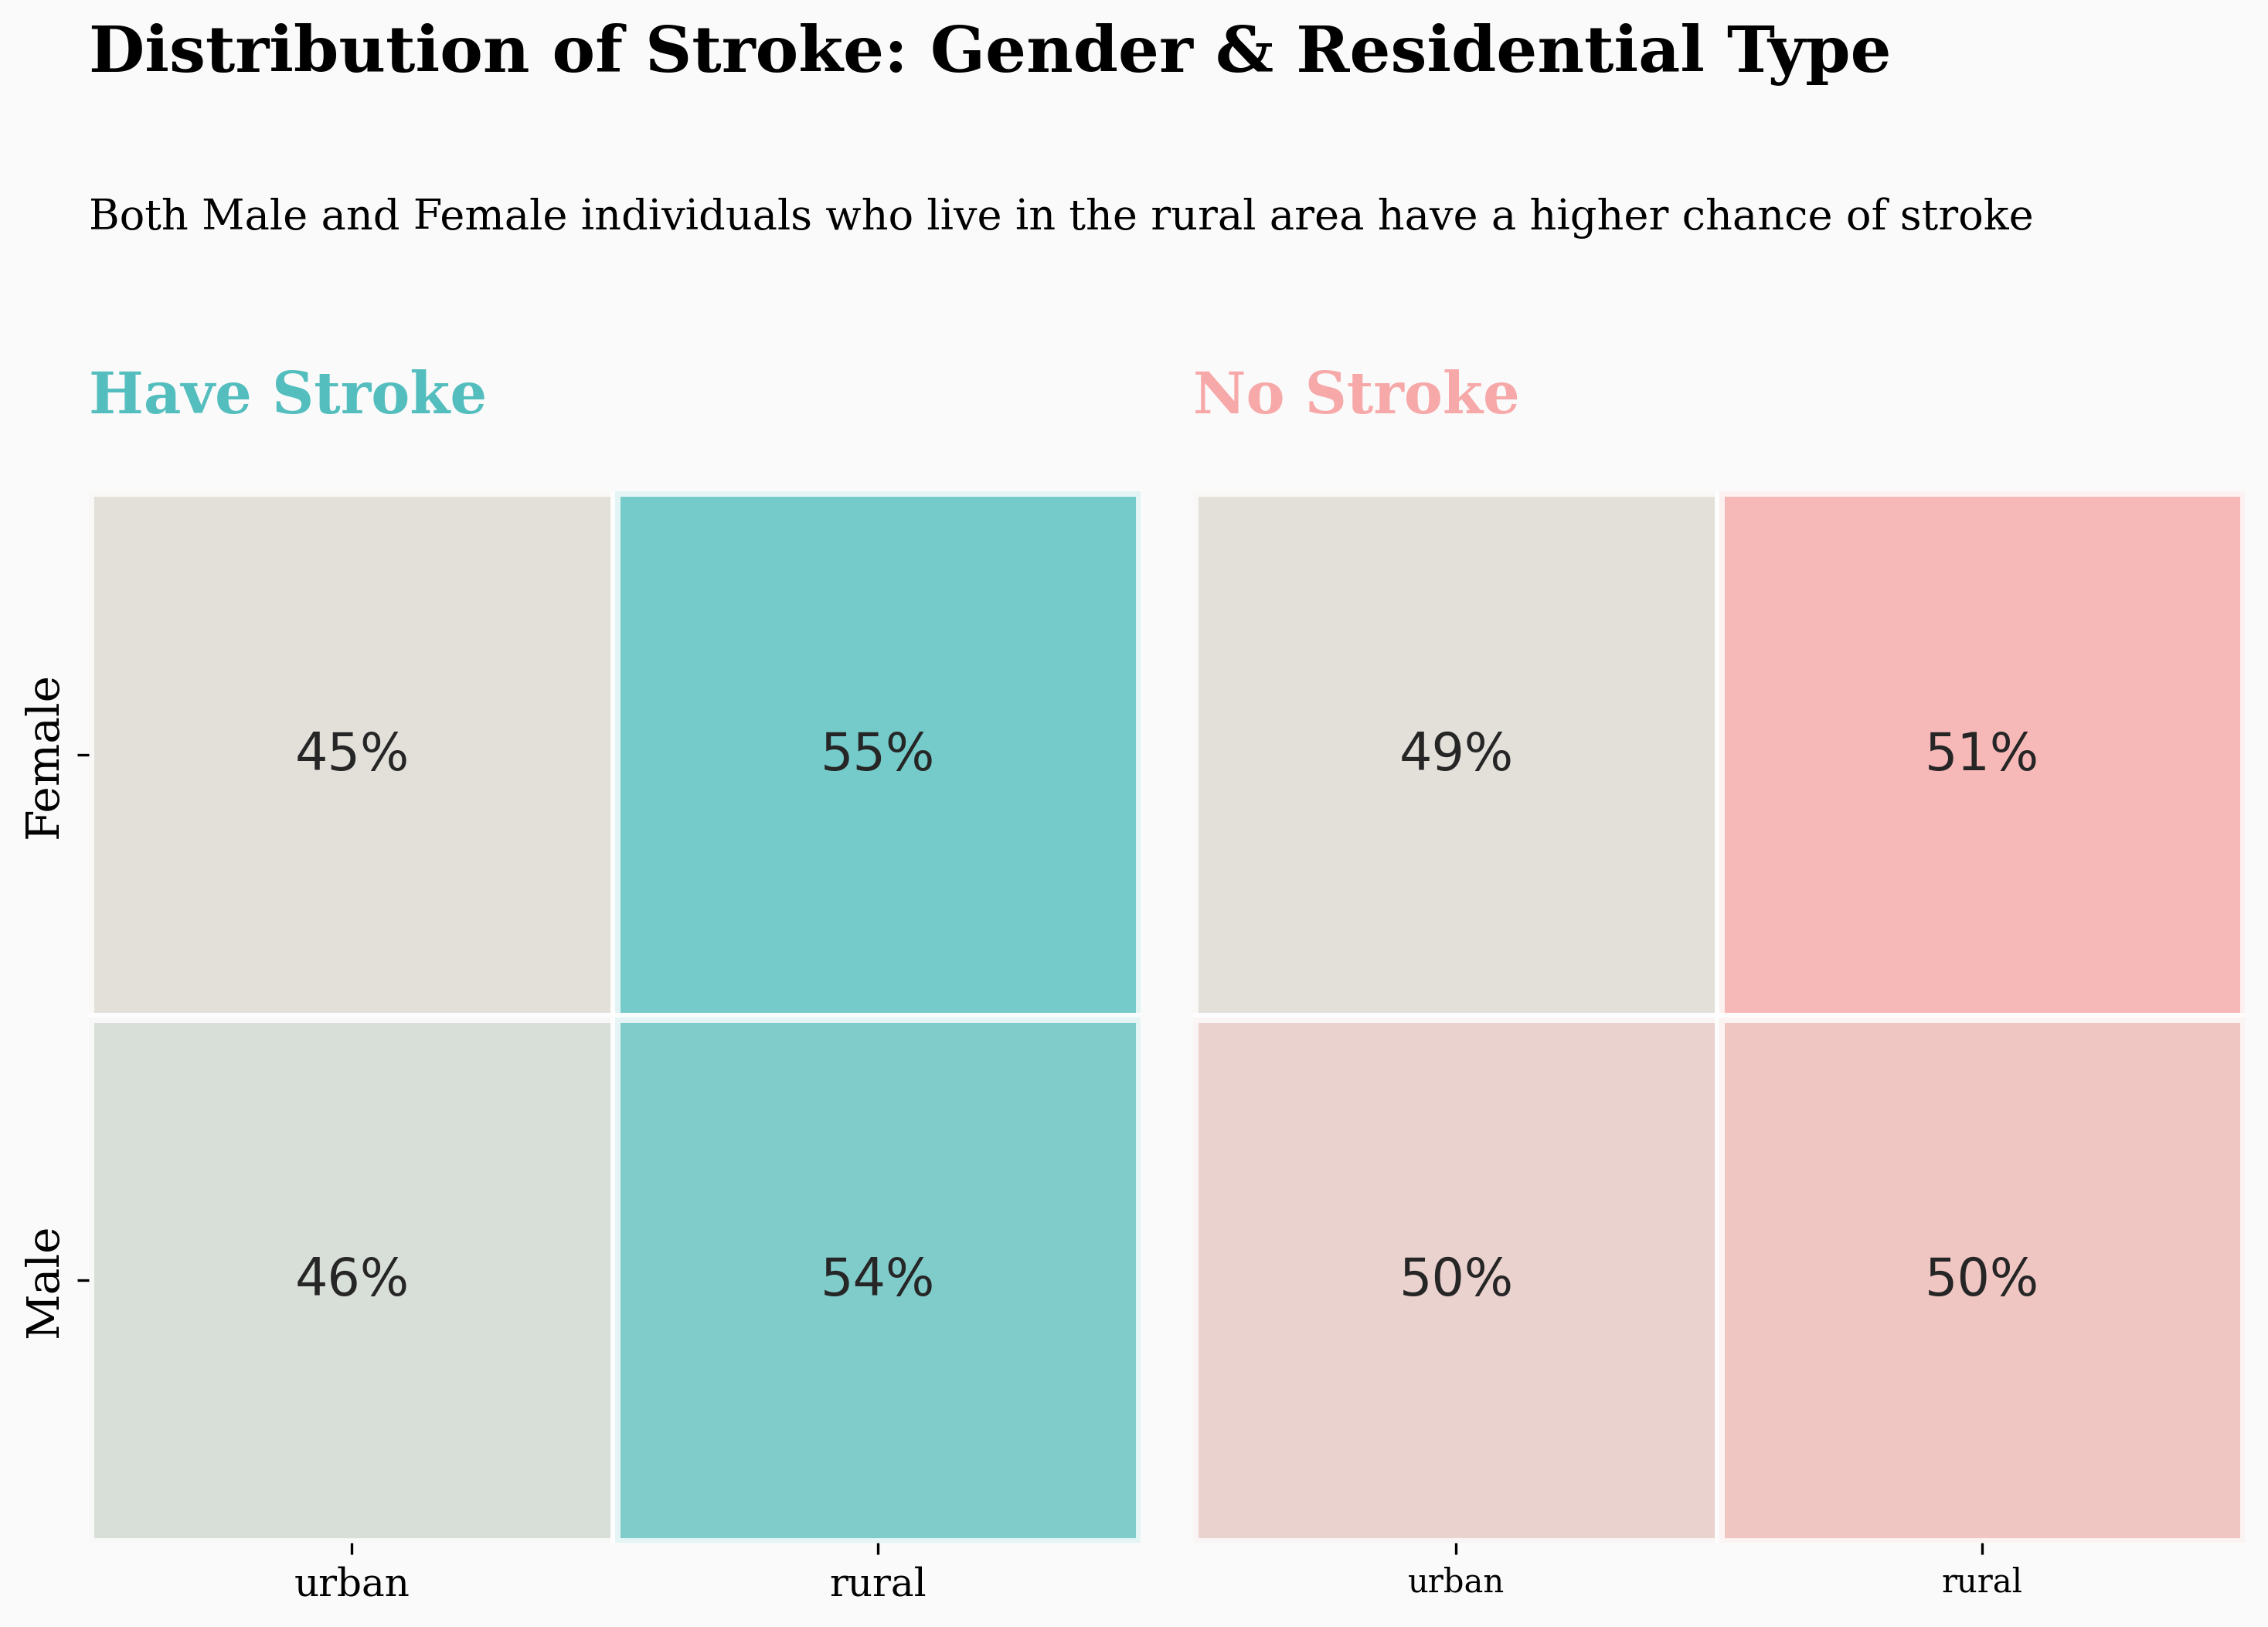

In [34]:
fig = plt.figure(figsize=(12, 8), dpi = 300)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.05, hspace = 0.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#### Variables: Gender and Residential Type

color1 = ["#dedad2", "#54bebe"]
color2 = ["#dedad2", "#f7a8a8"]
colormap1 = mpl.colors.LinearSegmentedColormap.from_list("", color1)
colormap2 = mpl.colors.LinearSegmentedColormap.from_list("", color2)

have_stroke = pd.crosstab(df_stroke_yes['gender'], [df_stroke_yes['Residence_type']], 
                          normalize = 'index')
no_stroke = pd.crosstab(df_stroke_no['gender'], [df_stroke_no['Residence_type']], 
                        normalize = 'index')

sns.heatmap(ax = ax0, data = have_stroke, linewidths = 0.2, square = True, 
            cbar_kws = {"orientation": "horizontal"}, cbar=False, cmap=colormap1,
            linewidth = 3, annot = True, fmt = '1.0%', annot_kws={"fontsize":16}, alpha = 0.8)

sns.heatmap(ax = ax1, data = no_stroke, linewidths = 0.2, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap2,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":16}, alpha = 0.8, 
            yticklabels=False)

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Main Heading
ax0.text(0, -0.8, 
         'Distribution of Stroke: Gender & Residential Type', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

## Subheading for the FIRST heatmap (Have Stroke)
ax0.text(0, -0.15, 
         'Have Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = "#54bebe"
        )
ax0.text(0, -0.5,
         'Both Male and Female individuals who live in the rural area have a higher chance of stroke',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

## Subheading for the SECOND heatmap (No Stroke)
ax1.text(0, -0.15, 
         'No Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = '#f7a8a8'
        )
ax1.text(0, -0.15, 
         '', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_xticklabels(['urban', 'rural'],
                    fontsize = 12,
                    fontfamily='serif',
                    color = 'black')
ax1.set_xticklabels(['urban', 'rural'],
                    fontsize = 10,
                    fontfamily='serif',
                    color = 'black')

ax0.axes.set_yticklabels(['Female', 'Male'],
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)

plt.show()


6. How does smoking affect stroke in patients?

[Text(0, 0.5, 'Female'), Text(0, 1.5, 'Male')]

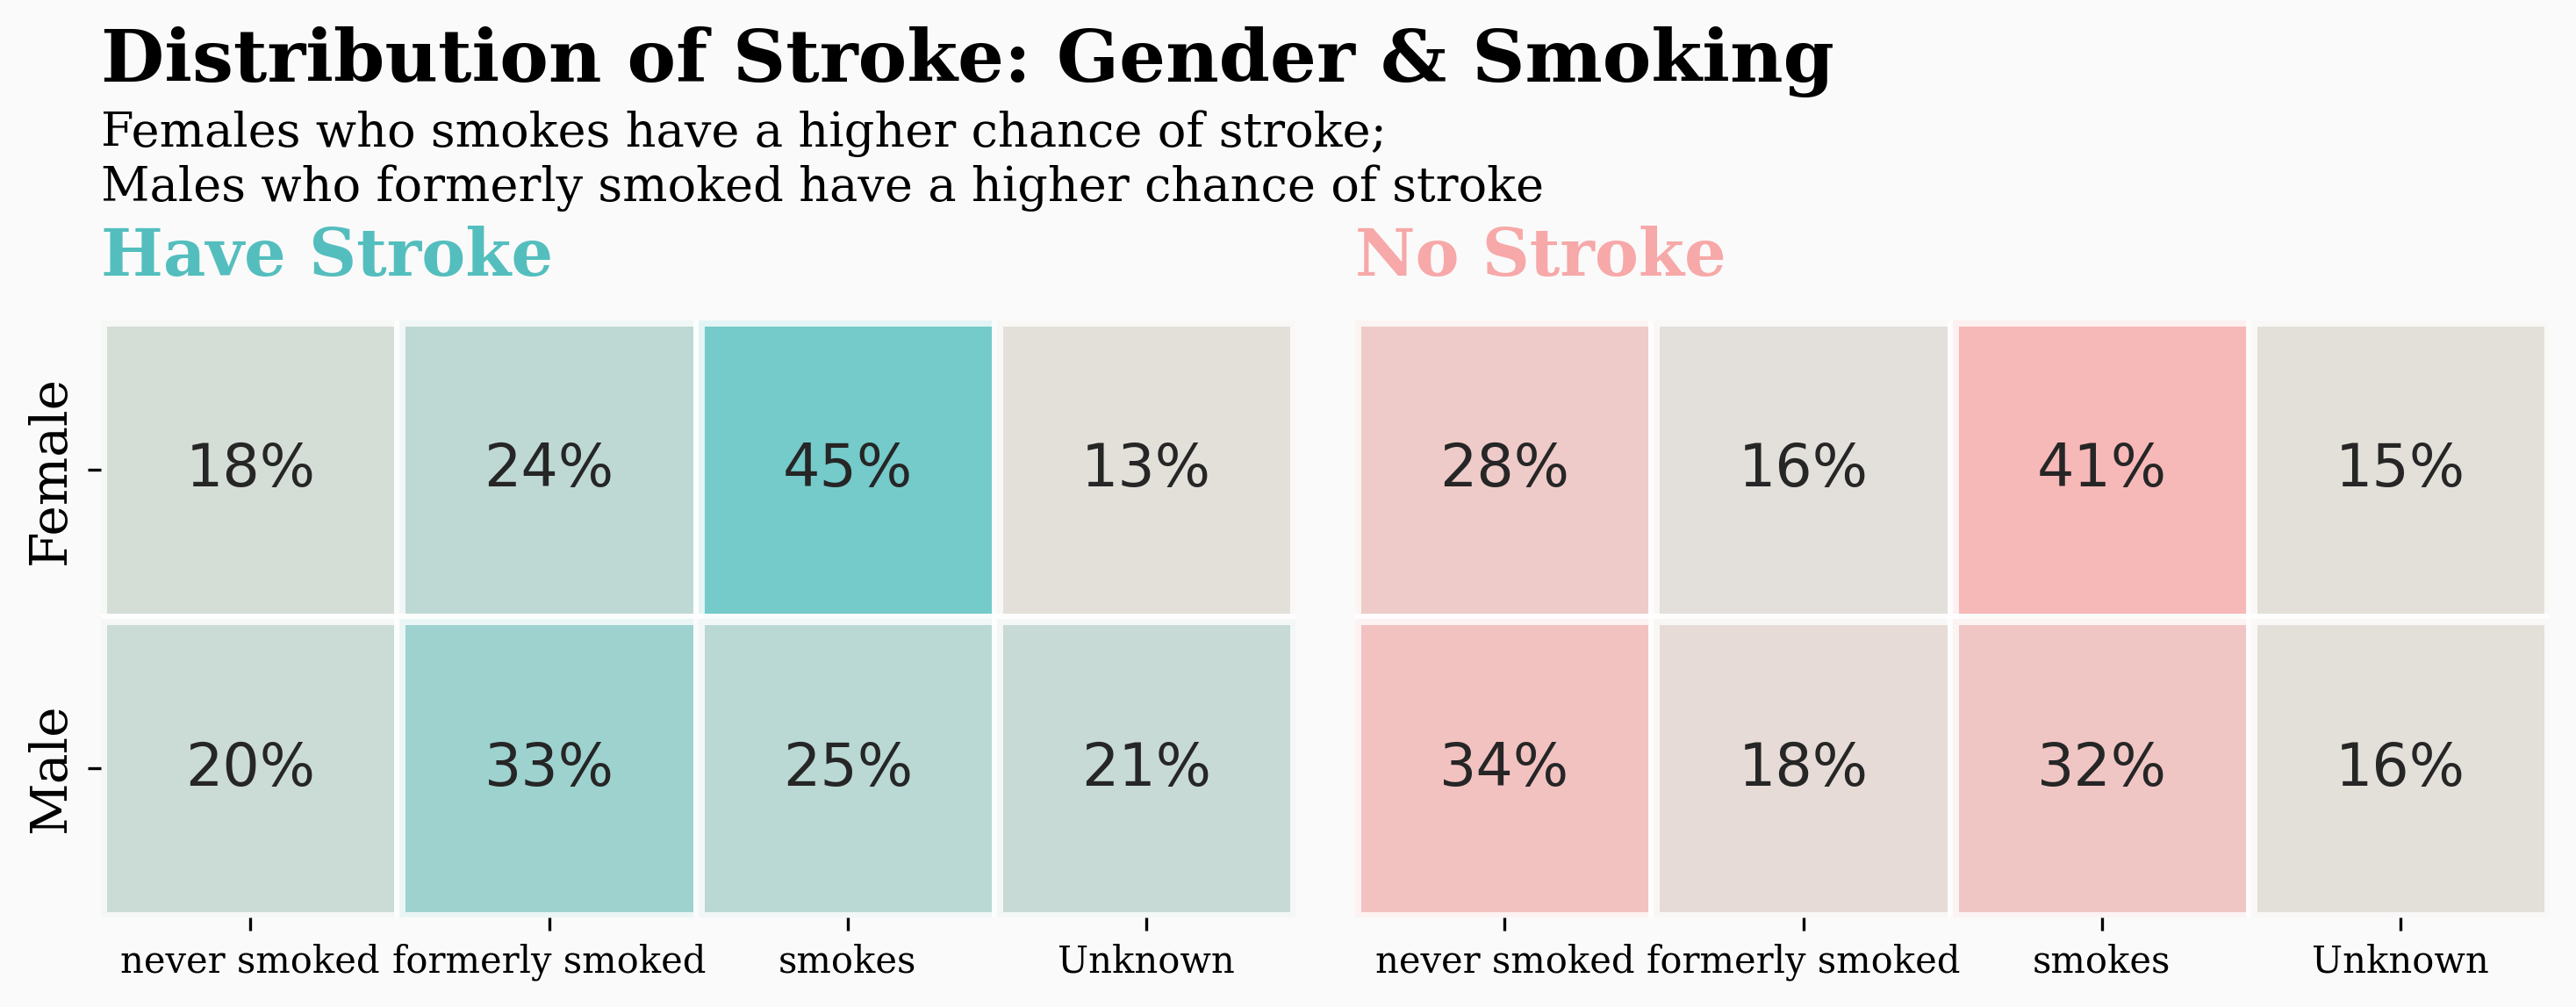

In [35]:
fig = plt.figure(figsize=(12, 8), dpi = 300)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.05, hspace = 0.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#### Variables: Gender and Marriage

color1 = ["#dedad2", "#54bebe"]
color2 = ["#dedad2", "#f7a8a8"]
colormap1 = mpl.colors.LinearSegmentedColormap.from_list("", color1)
colormap2 = mpl.colors.LinearSegmentedColormap.from_list("", color2)

have_stroke = pd.crosstab(df_stroke_yes['gender'], [df_stroke_yes['smoking_status']], 
                          normalize = 'index')
no_stroke = pd.crosstab(df_stroke_no['gender'], [df_stroke_no['smoking_status']], 
                        normalize = 'index')

sns.heatmap(ax = ax0, data = have_stroke, linewidths = 0.2, square = True, 
            cbar_kws = {"orientation": "horizontal"}, cbar=False, cmap=colormap1,
            linewidth = 3, annot = True, fmt = '1.0%', annot_kws={"fontsize":16}, alpha = 0.8)

sns.heatmap(ax = ax1, data = no_stroke, linewidths = 0.2, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap2,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":16}, alpha = 0.8, 
            yticklabels=False)

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Main Heading
ax0.text(0, -0.8, 
         'Distribution of Stroke: Gender & Smoking', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

## Subheading for the FIRST heatmap (Have Stroke)
ax0.text(0, -0.15, 
         'Have Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = "#54bebe"
        )
ax0.text(0, -0.4,
         'Females who smokes have a higher chance of stroke; \nMales who formerly smoked have a higher chance of stroke',
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

## Subheading for the SECOND heatmap (No Stroke)
ax1.text(0, -0.15, 
         'No Stroke', 
         fontsize=18, 
         fontweight='bold', 
         fontfamily='serif',
         color = '#f7a8a8'
        )
ax1.text(0, -0.15, 
         '', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_xticklabels(['never smoked', 'formerly smoked', 'smokes', 'Unknown'],
                    fontsize = 10,
                    fontfamily='serif',
                    color = 'black')
ax1.set_xticklabels(['never smoked', 'formerly smoked', 'smokes', 'Unknown'],
                    fontsize = 10,
                    fontfamily='serif',
                    color = 'black')

ax0.axes.set_yticklabels(['Female', 'Male'],
                         fontsize = 14,
                         fontfamily='serif',
                         color = 'black',
                         rotation= 90)

## Examining the dependency

Here we use Mutal Info Score to determine the dependency between the categorical values and the target variable (`stroke`).
- If MIS is 0, then the two variables are independent. 
- Higher the MIS, the higher dependence from each other.

In [36]:
# Function for mutual information score:
def mutual_info_category(series):
    return mutual_info_score(series, df_stroke['stroke'])

# Applying the MIS to the categorical variables:
df_cat = df_stroke_categorical.apply(mutual_info_category)
df_cat = df_cat.sort_values(ascending = False).to_frame(name='mutual_info_score')

In [45]:
def make_pretty(styler):

    color_map = sns.light_palette("#7eb0d5", as_cmap=True)

    styler.set_caption("Mutual Information Score of Categorical Variables")
    styler.relabel_index(["Mutal Info Score"], axis = 1)
    styler.format(precision=5, thousands=".", decimal=",")
    styler.background_gradient(axis=None, vmin=0.0001, vmax=0.007, cmap= color_map)

    return styler

make_pretty(df_cat.style)

,Mutal Info Score
ever_married,"0,00695"
work_type,"0,00683"
hypertension,"0,00598"
heart_disease,"0,00590"
smoking_status,"0,00275"
Residence_type,"0,00012"


- Our MIS shows that most of the categorical variables are NOT dependent towards the target variable. Therefore, no effect!
- Future Studies could focus on the difference in the estimation between WITH and NOT WITH these categorical values.

#### Correlation between numerical variables and the target variable (`Stroke`)

In [39]:
#### REMOVING NULL VALUES FROM THE DATASET

# df_stroke_numerical = df_stroke_numerical.dropna(subset=['bmi'])

# df_stroke_numerical.shape

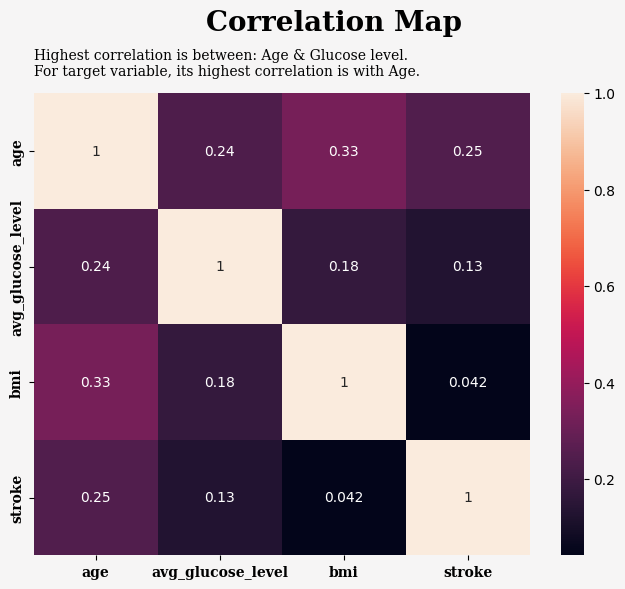

In [40]:
corr_variables = df_stroke[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()

# Using seaborn heatmap to produce a correlation map:

fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor = '#f6f5f5')

# Plotting the correlation map:
sns.heatmap(corr_variables, annot=True)

# Editing the plot:
plt.suptitle("Correlation Map", 
             fontsize=20, 
             fontweight='bold', 
             fontfamily='serif',
             y = 1.02)
plt.title("Highest correlation is between: Age & Glucose level. \nFor target variable, its highest correlation is with Age.", 
          fontsize=10, 
          fontweight='light', 
          fontfamily='serif',
          y = 1.02,
          loc='left')
plt.xticks(fontsize=10,
           fontweight='bold',
           fontfamily='serif')
plt.yticks(fontsize=10,
           fontweight='bold',
            fontfamily='serif')

ax.set_facecolor("#fbfbfb")


WHAT WE KNOW:
- There is a minimal correlation occurs between the numerical features/variables.
- Comparing the numerical data to our target variable `stroke`, `age` is the best metric out of all of them.

### What we know from EDA:

- There are marginal difference between those who smoked and never smoked in the likelihood of getting strokes.
- Those who live in Urban and Rural areas have similar likelihood of getting stroke. 
- Those who are/were married has almost five times likelihood of getting stroke!
- Those who works privately and for government has the similar chance of getting a stroke, however, those who self-employed work has higher chance of getting a stroke. 
- Individuals with hypertension and heart diseases has four (or more) times higher chance of getting a stroke than those with NO hypertension and heart diseases. 